### Проект 2. Разведывательный анализ данных

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого мы создадим модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. 

Будет проведет разведывательный анализ данных, чтобы определиться с параметрами будущей модели, а также составлен отчёт по его результатам.

### Этапы выполнения проекта
1. Первичная обработка данных. Анализ выбросов и пропусков.
2. Анализ на распределение признака для числовых переменных, устранение выбросов.
3. Оценка количества уникальных значений для номинативных переменных.
4. Преобразование данных по необходимости.
5. Корреляционный анализ количественных переменных.
6. Отбор не коррелирующих переменных.
7. Анализ номинативных переменных и устранение тех, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Выводы относительно качества данных и тех переменных, которые будут использоваться в дальнейшем построении модели.

### Описание датасета
Посмотрим на переменные, которые содержит датасет:

1. **school** — аббревиатура школы, в которой учится ученик

2. **sex** — пол ученика ('F' - женский, 'M' - мужской)

3. **age** — возраст ученика (от 15 до 22)

4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. **schoolsup** — дополнительная образовательная поддержка (yes или no)

17. **famsup** — семейная образовательная поддержка (yes или no)

18. **paid** — дополнительные платные занятия по математике (yes или no)

19. **activities** — дополнительные внеучебные занятия (yes или no)

20. **nursery** — посещал детский сад (yes или no)

21. **higher** — хочет получить высшее образование (yes или no)

22. **internet** — наличие интернета дома (yes или no)

23. **romantic** — в романтических отношениях (yes или no)

24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. **absences** — количество пропущенных занятий

29. **score** — баллы по госэкзамену по математике



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')

#  Посмотрим на данные
display('==========================Посмотрим на данные===============================')
display(df.head(10))
display('==========================Посмотрим на информацию===========================')
df.info()

'==========================Посмотрим на данные==============================='

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


'==========================Посмотрим на информацию==========================='

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
# После чтения из таблицы типами данных по умолчанию для каждого столбца могут быть
# bool, int64, float64, object, category, timedelta64 или datetime64. Проверим распределение
display('----------------Проверим распределение по типам----------')
display(df.dtypes.value_counts())
display('----------------Числовые колонки-------------------------')
display(df.select_dtypes(include=['float64', 'int64']))
display('----------------Категориальные колонки-------------------')
display(df.select_dtypes(include=['object']))

'----------------Проверим распределение по типам----------'

object     17
float64    12
int64       1
dtype: int64

'----------------Числовые колонки-------------------------'

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0


'----------------Категориальные колонки-------------------'

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,NaN,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,NaN,NaN,no,no,no,no,NaN,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


'----------------Оценим числовые колонки на графике-------------------'

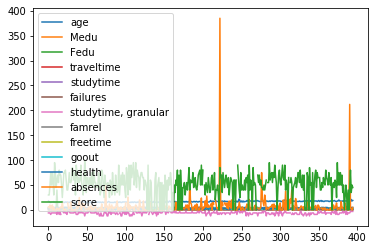

In [3]:
# Оценим числовые колонки на графике
display('----------------Оценим числовые колонки на графике-------------------')
df.select_dtypes(include=['float64', 'int64']).plot()

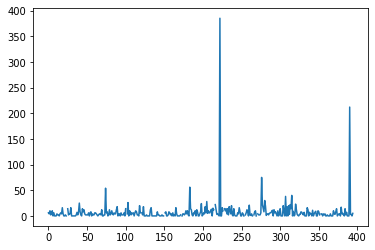

In [4]:
# каких то два товарища вообще забили на занятия, НО также это может быть домашнее обучение, почему нет? Либо это опечатка
df['absences'].plot()

In [5]:
# Пропусков много, но оценки приемлимые, также это может быть домашнее обучение, почему нет? Либо это опечатка,
# В будущем думаю лучше удалить эти две строки
df[df.absences > 100]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


'----------------Посмотрим на оценки на графике-------------------'

6

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

'----------------Посмотрим на оценки на графике-------------------'

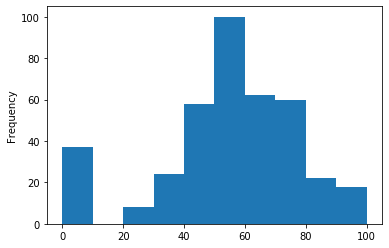

In [6]:
# Посмотрим на оценки
display('----------------Посмотрим на оценки на графике-------------------')
display(df.score.isna().sum())
display(df.score.value_counts())
display(df.score.describe())
display('----------------Посмотрим на оценки на графике-------------------')
df['score'].plot(kind='hist')

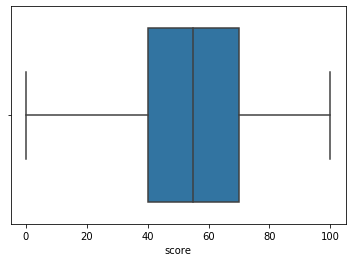

In [7]:
# как насчет выбросов?
sns.boxplot(x='score', data=df)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


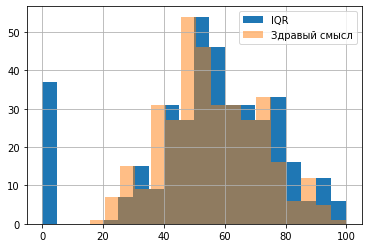

In [8]:
# Применим функцию из батончиков
median = df.score.median()
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

df.score.loc[df.score.between(perc25 - 1.5*IQR,
                              perc75 + 1.5*IQR)].hist(bins=20,
                                                      range=(0, 100),
                                                      label='IQR'
                                                      )
df.score.loc[df.score <= 100].hist(alpha=0.5,
                                   bins=20,
                                   range=(1, 100),
                                   label='Здравый смысл')
plt.legend()

'----------------Посмотрим на оценки на графике-------------------'

0

50.0     54
55.0     46
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

'----------------Посмотрим на оценки на графике-------------------'

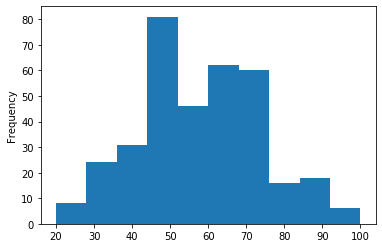

In [9]:
# Здравый смысл нам говорит, что нулевые оценки мы вынуждены удалить, самых главных данных тут нет
# КАК БЫЛО ВЫЯСНЕНО ВПОСЛЕДСТВИИ, НО НЕ ЗАМЕЧЕНО СНАЧАЛА, УДАЛИЛИСЬ И NaN, но это нам на руку
df = df.loc[df.score > 0]
display('----------------Посмотрим на оценки на графике-------------------')
display(df.score.isna().sum())
display(df.score.value_counts())
display(df.score.describe())
display('----------------Посмотрим на оценки на графике-------------------')
df['score'].plot(kind='hist')

Оценки распределены приблизительно нормально, велик процент крепких середнячков.

==============================================================================

### Первичная обработка данных
У нас осталось 352 записи, а процент пропусков данных довольно велик, поэтому постараемся по возможности не удалять, а заполнять данные чем-либо приемлимым. Числовых 13 столбцов, номинативных (категориальных) - 17, но строго говоря, судя из обсуждения, ранговые колонки также являются категориальными.

После изучения значения колонок хочется предречь, что негативно на оценки будут влиять наличие большой семьи, равно как и раздельное проживание родителей, низкий уровень образования родителей, плохие семейные отношения. Среднее влияние доп образование и семейная поддержка образования, наличие свободного времени. Остальное не решусь предсказывать. Проверим

### school

In [10]:
# Что у нас по школам
df.school.value_counts()

GP    311
MS     41
Name: school, dtype: int64

У нас есть колонка **'adress'** (тип адреса ученика ('U' - городской, 'R' - за городом)), проверим, как распределены типы школ в зависимости от город/не город

GPU    248
GPR     53
MSR     20
MSU     17
Name: where_school, dtype: int64

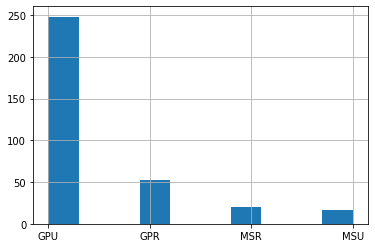

In [11]:
df['where_school'] = df['school']+df['address']
#df.plot(kind = 'hist')
display(df.where_school.value_counts())
df.where_school.hist()

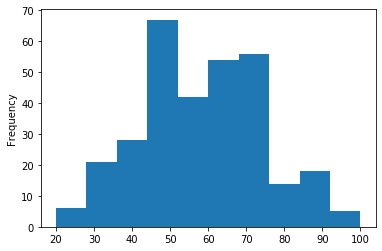

In [12]:
# Посмотрим на ценки в школах GP
df[df.school == 'GP']['score'].plot(kind='hist')

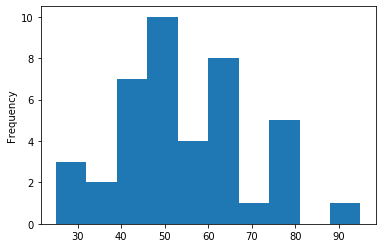

In [13]:
# Оценки в школах MS
df[df.school == 'MS']['score'].plot(kind='hist')

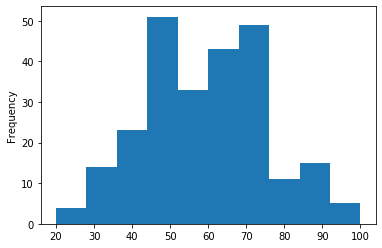

In [14]:
# Оценки в школах GP городских U

# без колонки where_school мы бы могли использовать такую строку
# df[(df.school == 'GP') & (df.address == 'U')]['score'].plot(kind='hist')

df[df.where_school == 'GPU']['score'].plot(kind='hist')

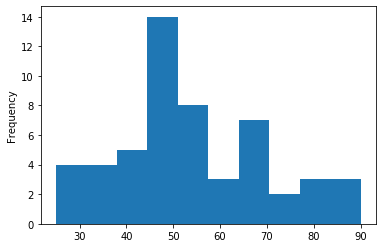

In [15]:
# Оценки в школах GP не городских R
df[df.where_school == 'GPR']['score'].plot(kind='hist')

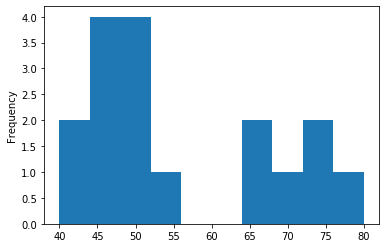

In [16]:
# Оценки в школах MS городских U
df[df.where_school == 'MSU']['score'].plot(kind='hist')

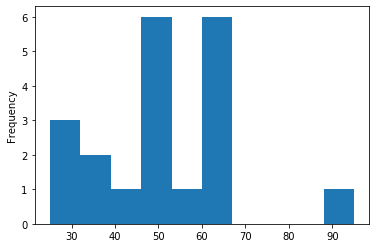

In [17]:
# Оценки в школах MS негородских R
df[df.where_school == 'MSR']['score'].plot(kind='hist')

Видно, что оценки отдельно в школах 'GP' и 'MS' распределены почти нормально, как и во всем датасете.

Школы типа 'GP' и городского и негородского типа показывают приблизительно нормальное распределение, что и у общего набора данных, у школ 'MS' распределение другое, причем в городской школе 'MS' оценки в основном средние и высокие, а в негородской в основном средние и низкие. 

Хочется бегло посмотреть на 'MSU'

In [18]:
# Как поживают пропуски?
df[df.where_school == 'MSU'].isna().sum()

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                1
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   1
reason                 3
guardian               2
traveltime             0
studytime              0
failures               0
schoolsup              1
famsup                 1
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 2
internet               0
romantic               1
famrel                 1
freetime               0
goout                  0
health                 0
absences               1
score                  0
where_school           0
dtype: int64

In [19]:
# Что нам расскажет describe
df[df.where_school == 'MSU'].describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
count,17,17,17.000000,17,17,16,17.000000,17.000000,17,16,14,15,17.000000,17.000000,17.000000,16,16,17,17,17,17.000000,15,17,16,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17
unique,1,2,NaN,1,2,2,NaN,NaN,5,4,4,3,NaN,NaN,NaN,1,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1
top,MS,M,NaN,U,LE3,T,NaN,NaN,services,services,course,mother,NaN,NaN,NaN,no,no,no,no,yes,NaN,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,MSU
freq,17,9,NaN,17,10,15,NaN,NaN,6,11,7,8,NaN,NaN,NaN,16,10,9,13,14,NaN,14,13,10,NaN,NaN,NaN,NaN,NaN,NaN,17
mean,NaN,NaN,17.941176,NaN,NaN,NaN,2.647059,2.529412,NaN,NaN,NaN,NaN,1.529412,1.764706,0.294118,NaN,NaN,NaN,NaN,NaN,-5.294118,NaN,NaN,NaN,3.437500,2.882353,3.235294,3.117647,14.875000,55.588235,NaN
std,NaN,NaN,0.826936,NaN,NaN,NaN,0.996317,1.067570,NaN,NaN,NaN,NaN,0.514496,0.562296,0.685994,NaN,NaN,NaN,NaN,NaN,1.686887,NaN,NaN,NaN,1.093542,1.111438,0.903425,1.409005,52.597687,13.214853,NaN
min,NaN,NaN,17.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,0.000000,40.000000,NaN
25%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,3.000000,2.000000,3.000000,2.000000,0.000000,45.000000,NaN
50%,NaN,NaN,18.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,3.000000,2.000000,50.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,4.000000,3.000000,4.000000,4.000000,4.000000,65.000000,NaN


В данных школах 17 учеников, чуть больше юношей, средний возраст 18 лет, минимум 17, максимум 20, учатся три года, возможно это какой-то специализированный колледж.

Немного больше семей (59%), где количество членов семьи <=3, у 15 человек семья полная.

Медианное значение образования родителей среднее специальное или 11 классов и чаще это госслужащие.

На выбор школы в 44% случаев повлияла образовательная программа. Не совсем понятен признак "опекун", оставим его.

До школы в основном недалеко - 15-30минут, хотя есть несчастные, которые из дома сразу попадают в школу.

На учебу помимо школы уделяется в медианном 2-5 часов, отметим это

Внеучебных неудач (очень загадочное определение) в подавляющем большинстве ноль.

Одновременно доп образовательная поддержка отсутствует у 16 человек. Тут была ошибка резидента => "умным" ученикам не нужны доп. занятия (репетиторство), я ожидал что они занимаются. А ведь действительно, репетиторов нанимают, когда дела плохи, а не когда хороши.

Семейной образовательной поддержки больше нет, чем да.

В отдельную группу выделена доп. платная математика, но ей тоже занимаются только 53%.

В основном ученики не занимаются доп. внеучебными занятиями (остается только догадываться, в чем разница с доп. образовательной поддержкой) - это 72%.

Большинство в детстве посещали дет сад - 82%.

studytime, granular не описан параметр, но отметим, что это все отрицательные значения

Высшее образование желают получить 14 человек, это 82%

Доступ в Интернет есть у 76%

Имеют отношения более половины учеников.

Семейные отношения в большинстве своем хорошие.

Свободного времени в основном достаточно.

Также проводят достаточно времени с друзьями.

Не обладают проблемами со здоровьем.

Медианное значение пропущенных занятий - 2, ученики данных школ редко пропускают занятия, хотя есть значение в 212, скорее всего это семейные обстоятельства или как раз недомогание, область выброса.

Медианный и средний бал у нас 50, однако минимальный 40, учтем это.

In [20]:
# Посмотрим на GPU, как отражающие общую тенденцию в наборе,
# Пропуски есть, но мы все таки прикинем
df[df.where_school == 'GPU'].isna().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                18
Pstatus                32
Medu                    0
Fedu                   17
Mjob                   15
Fjob                   20
reason                 11
guardian               16
traveltime             15
studytime               6
failures               14
schoolsup               7
famsup                 29
paid                   26
activities             11
nursery                 7
studytime, granular     6
higher                 13
internet               22
romantic               20
famrel                 15
freetime                7
goout                   3
health                 10
absences                5
score                   0
where_school            0
dtype: int64

In [21]:
df[df.where_school == 'GPU'].describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
count,248,248,248.000000,248,230,216,248.000000,231.000000,233,228,237,232,233.000000,242.000000,234.000000,241,219,222,237,241,242.000000,235,226,228,233.000000,241.000000,245.000000,238.000000,243.000000,248.000000,248
unique,1,2,NaN,1,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,GPU
freq,248,129,NaN,248,163,190,NaN,NaN,79,128,80,160,NaN,NaN,NaN,204,140,117,120,198,NaN,227,202,161,NaN,NaN,NaN,NaN,NaN,NaN,248
mean,NaN,NaN,16.427419,NaN,NaN,NaN,2.907258,2.783550,NaN,NaN,NaN,NaN,1.313305,2.041322,0.226496,NaN,NaN,NaN,NaN,NaN,-6.123967,NaN,NaN,NaN,3.978541,3.261411,3.097959,3.508403,8.135802,59.052419,NaN
std,NaN,NaN,1.194952,NaN,NaN,NaN,1.077685,2.680994,NaN,NaN,NaN,NaN,0.594982,0.838856,0.631762,NaN,NaN,NaN,NaN,NaN,2.516568,NaN,NaN,NaN,0.916545,0.949849,1.074383,1.442986,25.558111,16.365303,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,-1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,2.000000,2.000000,50.000000,NaN
50%,NaN,NaN,16.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000,NaN
75%,NaN,NaN,17.000000,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,5.000000,4.000000,4.000000,5.000000,10.000000,70.000000,NaN


В данной школе 248 учеников, чуть больше девушек, средний возраст 16 лет, от 15 до 22, видно, что после 18 лет большинство учеников уходят их данных школ, либо после трех лет обучения начинается спецпрограмма, которая нужна не всем, либо это второгодники)).

Немного больше семей (66%), где количество членов семьи >3, у 77% семья полная.

Медианное значение образования родителей среднее специальное или 11 классов, профессии самые разные.

На выбор школы в 32% случаев повлияла образовательная программа. Не совсем понятен признак "опекун", осавим его.

До школы в основном близко, менее 15 минут, то есть школа выбрана из географического положения (районирование).

На учебу помимо школы уделяется также в медианном 2-5 часов, отметим это

Внеучебных неудач (очень загадочное определение) в подавляющем большинстве ноль.

Одновременно доп образовательная поддержка отсутствует у 204 человек, это 82%

Семейной образовательной поддержки больше да, чем нет.

В отдельную группу выделена доп. платная математика, но ей тоже занимаются около половины

Половина учеников занимаются доп. внеучебными занятиями (остается только догадываться, в чем разница с доп. образовательной поддержкой).

Большинство в детстве посещали дет сад - 80%.

studytime, granular не описан параметр, но отметим, что это все отрицательные значения

Высшее образование желают получить 92%

Доступ в Интернет есть у 80%

Имеют отношения 65% учеников.

Семейные отношения в большинстве своем хорошие.

Свободного времени в основном достаточно.

Также проводят достаточно времени с друзьями.

Не обладают проблемами со здоровьем.

Медианное значение пропущенных занятий - 4, ученики данных школ редко пропускают занятия, хотя есть значение в 385, скорее всего это семейные обстоятельства или как раз недомогание, область выброса.

Медианный и средний бал у нас 50, минимальное значение 20


### Выводы
Параметры, по которым существенно различаются MSU и GPU - расстояние до школы, и возраст начала и продолжения учебы. Можно предположить, что в школы типа MSU попадают не по географическому признаку, а платно, либо в них аккумулируются более способные ученики в принципе. Это приводит к двоякому выводу: либо в таких школах, так как они платные, качество образования выше, либо туда изначально попадают ученики с более высоким средним баллом.

==============================================================================================================

Проанализируем параметры в наборах данных с оценками меньше 50 баллов и от 50 баллов

In [22]:
# сначала >= 50
display('----------------Характеристики датасета с оценками >50-------------------')
df[df.score >= 50].describe(include='all')

'----------------Характеристики датасета с оценками >50-------------------'

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
count,262,262,262.000000,249,245,231,261.000000,248.000000,248,238,251,239,244.000000,255.000000,246.000000,258,232,236,253,251,255.000000,246,240,239,246.000000,255.000000,258.000000,252.000000,254.000000,262.000000,249
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,GPU
freq,233,131,NaN,198,170,206,NaN,NaN,80,134,84,164,NaN,NaN,NaN,232,140,127,131,199,NaN,239,205,166,NaN,NaN,NaN,NaN,NaN,NaN,187
mean,NaN,NaN,16.522901,NaN,NaN,NaN,2.854406,2.750000,NaN,NaN,NaN,NaN,1.434426,2.086275,0.162602,NaN,NaN,NaN,NaN,NaN,-6.258824,NaN,NaN,NaN,3.971545,3.215686,2.957364,3.460317,6.767717,64.561069,NaN
std,NaN,NaN,1.183155,NaN,NaN,NaN,1.082141,2.611482,NaN,NaN,NaN,NaN,0.696702,0.869659,0.509085,NaN,NaN,NaN,NaN,NaN,2.608977,NaN,NaN,NaN,0.914288,1.010062,1.077775,1.445701,24.694761,12.483633,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,2.000000,1.000000,55.000000,NaN
50%,NaN,NaN,16.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,62.500000,NaN
75%,NaN,NaN,17.000000,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN,2.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,5.000000,4.000000,4.000000,5.000000,8.000000,75.000000,NaN


'----------------Оценки на графике-------------------'

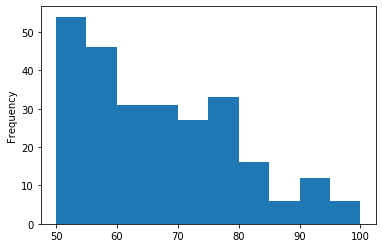

In [23]:
display('----------------Оценки на графике-------------------')
df[df.score >= 50]['score'].plot(kind='hist')

В данной группе 262 ученика, чуть больше девушек, средний возраст 16 лет, от 15 до 20, 22-х летние отвалились, вероятно это все-таки второгодники.

80% городские.

Немного больше семей (65%), где количество членов семьи >3, у 79% семья полная.

Медианное значение образования родителей среднее специальное или 11 классов, профессии самые разные.

На выбор школы в 32% случаев повлияла образовательная программа. Не совсем понятен признак "опекун", оставим его.

До школы в основном близко, менее 15 минут, то есть школа выбрана из географического положения (районирование).

На учебу помимо школы уделяется также в медианном 2-5 часов, отметим это

Внеучебных неудач (очень загадочное определение) в подавляющем большинстве ноль.

Одновременно доп образовательная поддержка отсутствует у 232 человек, это 89%

Семейной образовательной поддержки больше да, чем нет - 60%.

В отдельную группу выделена доп. платная математика, но ей тоже занимаются около половины

Половина учеников занимаются доп. внеучебными занятиями (остается только догадываться, в чем разница с доп. образовательной поддержкой).

Большинство в детстве посещали дет сад - 80%.

studytime, granular не описан параметр, но отметим, что это все отрицательные значения

Высшее образование желают получить 91%

Доступ в Интернет есть у 78%

Имеют отношения 63% учеников.

Семейные отношения в большинстве своем хорошие.

Свободного времени в основном достаточно.

Также проводят достаточно времени с друзьями.

Не обладают проблемами со здоровьем.

Медианное значение пропущенных занятий - 4, ученики данных школ редко пропускают занятия, хотя есть значение в 385, скорее всего это семейные обстоятельства или как раз недомогание, область выброса.

Медианный бал 62.5 и средний бал у нас 50.

### ВЫВОДЫ
Все значения хорошистов в целом соответствуют группе GPU, в которой у нас нормальное распределение

==============================================================================================

In [24]:
# теперь < 50
df[df.score < 50].describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
count,90,90,90.000000,89,83,80,89.000000,83.000000,87,82,86,84,85.000000,90.000000,86.000000,85,84,80,87,89,90.000000,87,83,84,82.000000,89.000000,88.000000,87.000000,88.000000,90.000000,89
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,GPU
freq,78,51,NaN,67,58,71,NaN,NaN,35,42,35,61,NaN,NaN,NaN,63,56,43,46,73,NaN,81,69,53,NaN,NaN,NaN,NaN,NaN,NaN,61
mean,NaN,NaN,16.955556,NaN,NaN,NaN,2.685393,2.385542,NaN,NaN,NaN,NaN,1.411765,1.933333,0.581395,NaN,NaN,NaN,NaN,NaN,-5.800000,NaN,NaN,NaN,3.853659,3.292135,3.465909,3.678161,11.909091,37.944444,NaN
std,NaN,NaN,1.405536,NaN,NaN,NaN,1.113915,1.045680,NaN,NaN,NaN,NaN,0.677779,0.746528,0.926284,NaN,NaN,NaN,NaN,NaN,2.239583,NaN,NaN,NaN,0.944405,0.990893,1.049892,1.307352,24.472192,6.699591,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,-1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.500000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,3.250000,3.000000,3.000000,3.000000,2.000000,31.250000,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.500000,4.000000,6.000000,40.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,14.000000,45.000000,NaN


'----------------Оценки на графике-------------------'

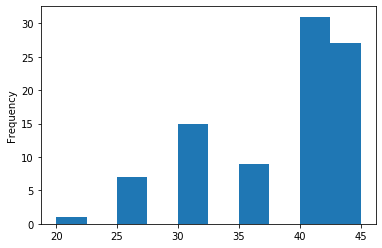

In [25]:
display('----------------Оценки на графике-------------------')
df[df.score < 50]['score'].plot(kind='hist')

В данной группе 90 учеников, чуть больше девушек, средний возраст 17 лет, от 15 до 22

75% городские.

Немного больше семей (64%), где количество членов семьи >3, у 79% семья полная.

Медианное значение образования матери среднее специальное или 11 классов, у отца СТАЛО 5-9 классов,

Профессии самые разные.

На выбор школы в 32% случаев повлияла образовательная программа. Не совсем понятен признак "опекун", оставим его.

До школы в основном близко, менее 15 минут, то есть школа выбрана из географического положения (районирование).

На учебу помимо школы уделяется также в медианном 2-5 часов, отметим, что показатель у всех групп одинаков))

Внеучебных неудач (очень загадочное определение) в третьем квантиле появились цифры - 1 неудача.

Одновременно доп образовательная поддержка отсутствует у 70%

Семейной образовательной поддержки больше да, чем нет - 62%.

В отдельную группу выделена доп. платная математика, у 48% нет платной математики

Половина учеников занимаются доп. внеучебными занятиями (остается только догадываться, в чем разница с доп. образовательной поддержкой).

Большинство в детстве посещали дет сад - 81%.

studytime, granular не описан параметр, но отметим, что это все отрицательные значения

Высшее образование желают получить 90%

Доступ в Интернет есть у 77%

Имеют отношения более половины учеников.

Семейные отношения в большинстве своем хорошие.

Свободного времени в основном достаточно.

Также проводят достаточно времени с друзьями.

Не обладают проблемами со здоровьем.

Медианное значение пропущенных занятий - 6, ученики данных школ чаще пропускают занятия, хотя есть значение в 212, скорее всего это семейные обстоятельства или как раз недомогание, область выброса.

Медианный бал 62.5 и средний бал у нас 40.

### ВЫВОДЫ

Шансы хуже учиться у ребенка, родители которого имеют неполное образование (в частности отец), а также если ученик пропускает занятия.

Мои предположения подтвердились предварительно только насчет образования родителей. На фактор пропуска занятий не обратил внимания(


Колонку **school** пока оставим

==============================================================
### age

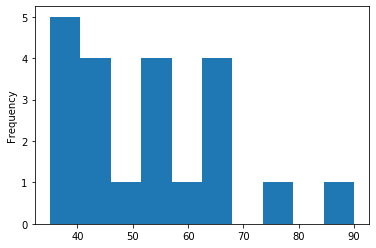

In [26]:
df[(df.age > 18)]['score'].plot(kind='hist')

In [27]:
df[(df.age > 18)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 127 to 394
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               21 non-null     object 
 1   sex                  21 non-null     object 
 2   age                  21 non-null     int64  
 3   address              20 non-null     object 
 4   famsize              20 non-null     object 
 5   Pstatus              18 non-null     object 
 6   Medu                 21 non-null     float64
 7   Fedu                 21 non-null     float64
 8   Mjob                 21 non-null     object 
 9   Fjob                 19 non-null     object 
 10  reason               20 non-null     object 
 11  guardian             18 non-null     object 
 12  traveltime           21 non-null     float64
 13  studytime            20 non-null     float64
 14  failures             20 non-null     float64
 15  schoolsup            19 non-null     ob

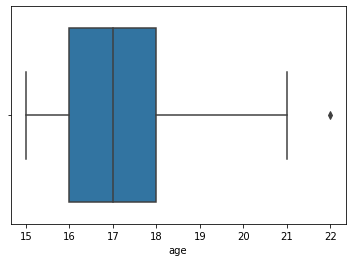

In [28]:
sns.boxplot(x='age', data=df)

### ВЫВОД
С 18 лет вообще данные можно удалить, не показатель это



'=================Сколько у нас осталось записей?'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               0 non-null      object 
 1   sex                  0 non-null      object 
 2   age                  0 non-null      int64  
 3   address              0 non-null      object 
 4   famsize              0 non-null      object 
 5   Pstatus              0 non-null      object 
 6   Medu                 0 non-null      float64
 7   Fedu                 0 non-null      float64
 8   Mjob                 0 non-null      object 
 9   Fjob                 0 non-null      object 
 10  reason               0 non-null      object 
 11  guardian             0 non-null      object 
 12  traveltime           0 non-null      float64
 13  studytime            0 non-null      float64
 14  failures             0 non-null      float64
 15  schoolsup            0 non-null      object 
 16  fa

None

'=================Как это выклядит в плане оценок?'

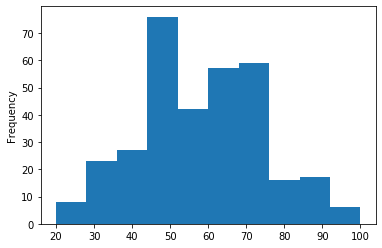

In [29]:
df = df[df.age < 19]
display('=================Сколько у нас осталось записей?')
display(df[(df.age > 18)].info())
display('=================Как это выклядит в плане оценок?')
df['score'].plot(kind='hist')

=======================================================
### sex
Толерантно не будем строить предположения, кто умнее, мальчики или девочки, колонку удаляем

In [30]:
df.drop(['sex'], inplace=True, axis=1)

In [31]:
# сохраним наш набор на этом этапе
df_score_age_sex = df.copy()

In [32]:
df = df_score_age_sex.copy()

### address, traveltime
Исследование выше показало, что существенного влияния на результаты географическое положение не оказывает, кроме школ типа 'MS' в городской черте, там оценки не содержат низких значений, поэтому колонку сохраняем.

Посмотрим на колонку **address**

address — тип адреса ученика ('U' - городской, 'R' - за городом)

'==========================Посмотрим на пропуски==============================='

13

'==========================Посмотрим на виды значений=========================='

U    250
R     68
Name: address, dtype: int64

'==========================Статистику=========================================='

count     318
unique      2
top         U
freq      250
Name: address, dtype: object

'==========================Гистограмма=========================================='

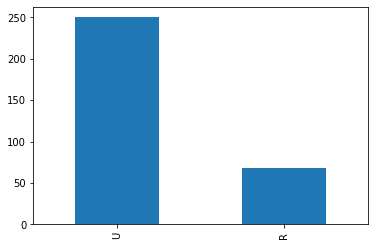

In [33]:
display('==========================Посмотрим на пропуски===============================')
display(df.address.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.address.value_counts())
display('==========================Статистику==========================================')
display(df.address.describe())
display('==========================Гистограмма==========================================')
df.address.value_counts().plot(kind='bar')

Посмотрим на колонку traveltime

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

'==========================Посмотрим на пропуски==============================='

23

'==========================Посмотрим на виды значений=========================='

1.0    204
2.0     82
3.0     15
4.0      7
Name: traveltime, dtype: int64

'==========================Статистику=========================================='

count    308.000000
mean       1.431818
std        0.693310
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

'==========================Гистограмма=========================================='

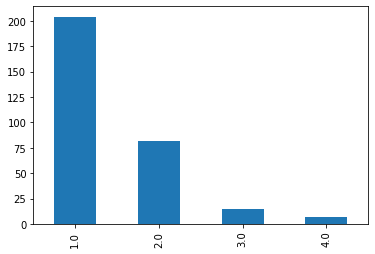

In [34]:
display('==========================Посмотрим на пропуски===============================')
display(df.traveltime.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.traveltime.value_counts())
display('==========================Статистику==========================================')
display(df.traveltime.describe())
display('==========================Гистограмма==========================================')
df.traveltime.value_counts().plot(kind='bar')

В обсуждениях высказано было мнение, что город/не город может зависеть от того, насколько далеко находится школа, посмотрим:

In [35]:
# Выделим колонки расположение и время до школы
df_adress_traveltime = df[['address', 'traveltime']]
df_adress_traveltime

,address,traveltime
0,U,2.0
1,U,1.0
2,U,1.0
3,U,1.0
4,U,1.0
...,...,...
385,R,NaN
386,R,3.0
388,U,1.0
391,U,2.0


address  traveltime
R        1.0            28
         2.0            22
         3.0             9
         4.0             4
U        1.0           170
         2.0            56
         3.0             6
         4.0             3
Name: traveltime, dtype: int64

'==========================Гистограмма=========================================='

address  traveltime
R        1.0           AxesSubplot(0.125,0.125;0.775x0.755)
         2.0           AxesSubplot(0.125,0.125;0.775x0.755)
         3.0           AxesSubplot(0.125,0.125;0.775x0.755)
         4.0           AxesSubplot(0.125,0.125;0.775x0.755)
U        1.0           AxesSubplot(0.125,0.125;0.775x0.755)
         2.0           AxesSubplot(0.125,0.125;0.775x0.755)
         3.0           AxesSubplot(0.125,0.125;0.775x0.755)
         4.0           AxesSubplot(0.125,0.125;0.775x0.755)
Name: traveltime, dtype: object

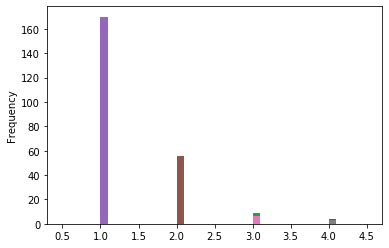

In [36]:
# Посмотрим на время в пути до школы в городе (U) и не городе (R)
# 1 - <15 мин.
# 2 - 15-30 мин.
# 3 - 30-60 мин.
# 4 - >60 мин.
display(df_adress_traveltime.groupby(
    ['address', 'traveltime'])['traveltime'].count())
display('==========================Гистограмма==========================================')
df_adress_traveltime.groupby(['address', 'traveltime'])[
    'traveltime'].plot(kind='hist')

score                 
traveltime   1.0 2.0 3.0 4.0  All
address                          
R             28  22   9   4   63
U            170  56   6   3  235
All          198  78  15   7  298

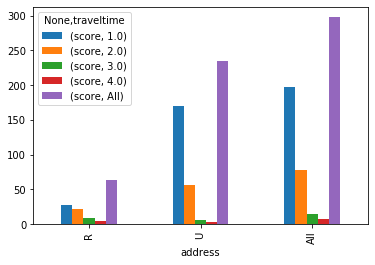

In [37]:
# Также через сводную таблицу, для тренировки и покрасивее

# 6.12 Функция pivot_table позволяет быстро и просто составлять сводные таблицы. Попробуем сформировать таблицу,
# которая представлена выше
# В параметр values мы передаем ту колонку, по которой нам нужно строить сводные данные, применяя агрегирующую функцию сумма.
# В параметр index передадим ту колонку, данные которой будут представлены строками сводной таблицы.
# В параметр columns передаем колонку, значения которой будут в столбцах.
# В параметр aggfunc передаем агрегирующую функцию. Помните, мы проходили их, когда рассматривали функцию groupby?
# Все эти функции можно применять и при построении сводных таблиц.
# Для того, чтобы добавить столбец и строку с итоговыми значениями, нужно добавить параметр margins=True:

df3 = df.pivot_table(values=['score'],
                     index=['address'],
                     columns=['traveltime'],
                     aggfunc='count',
                     margins=True,
                     fill_value=0)
display(df3)
df3.plot(kind='bar')

И для города и не города большинство "времен в пути" приходится на значения 0-30 минут, следовательно говорить, что если время в пути долгое, то это негородская школа, нельзя.

Предположу, что если бы были данные о плате за учебу, и те ученики, которые попали в MSU все были платными, это бы объяснило, почему у них уходит дольше на дорогу - они попали не по месту жительства, а по возможности заплатить за понравившуюся школу, которая дальше, соответственно платникам без заполненного поля address мы бы поставили 'U', а без заполненного traveltime - поставили бы значение 2. Но этого поля нет.

Поэтому все NaN значения заполняем значением 'U'

In [38]:
df.address.isna().sum()
# кроме того с просторов stackoverflow.com как узнать количество NaN
# count_nan = len(df.address) - df.address.count()

# количество в столбце
# df.address.isnull().sum(axis = 0)

# количество в строке
# df.loc[2].isnull().sum(axis = 0)

13

In [39]:
# СПОСОБ 1 заполнить U все NaN,
# df.address = df.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
# df.address = df.address.astype(str).apply(lambda x: 'U' if x.strip() == 'nan' else x)
# df.address.isna().sum()
# 0
#  ========================================================
# СПОСОБ 2
# нашел, причем с astype(str)не работает, заполняю модой df.address.mode()[0]
# dff.address = dff.address.astype(str).apply(lambda x: 'U' if pd.isna(x) else x)
#  ========================================================
# СПОСОБ 3
# df.address = df.address.apply(lambda x: df.address.mode()[0] if pd.isna(x) else x)
#  ========================================================
# СПОСОБ 4
# df.address = df.address.fillna(df.address.mode()[0])
# display(df.head(10))

Чтобы не заполнять огульно все модой, решено воспользоваться интерполяцией, так хотя бы равномерно добавит город/негород

In [40]:
# Filling in NaN in a Series by padding, but filling at most two consecutive NaN at a time.
df.address = df.address.interpolate(method='pad', limit=2)

In [41]:
display(pd.DataFrame(df.address.value_counts()))
display('==========================Посмотрим на пропуски===============================')
display(df.address.isna().sum())

,address
U,259
R,72


'==========================Посмотрим на пропуски==============================='

0

In [42]:
# После заполнения модой было pd.DataFrame(df.address.value_counts())

# address
# U	263
# R	68

==============================================================
### famsize, Pstatus, famrel 

'==========================Посмотрим на пропуски==============================='

23

'==========================Посмотрим на виды значений=========================='

GT3    213
LE3     95
Name: famsize, dtype: int64

'==========================Статистику=========================================='

count     308
unique      2
top       GT3
freq      213
Name: famsize, dtype: object

'==========================Гистограмма=========================================='

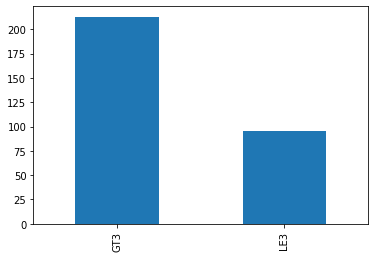

In [43]:
# Посмотрим, что у нас за категории в famsize
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)
display('==========================Посмотрим на пропуски===============================')
display(df.famsize.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.famsize.value_counts())
display('==========================Статистику==========================================')
display(df.famsize.describe())
display('==========================Гистограмма==========================================')
df.famsize.value_counts().plot(kind='bar')

'==========================Посмотрим на пропуски==============================='

38

'==========================Посмотрим на виды значений=========================='

T    263
A     30
Name: Pstatus, dtype: int64

'==========================Статистику=========================================='

count     293
unique      2
top         T
freq      263
Name: Pstatus, dtype: object

'==========================Гистограмма=========================================='

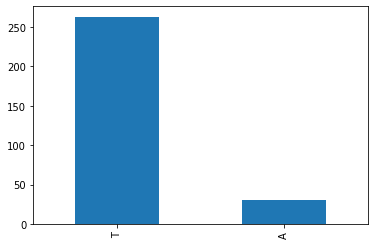

In [44]:
# Посмотрим, что у нас за категории в Pstatus
# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
display('==========================Посмотрим на пропуски===============================')
display(df.Pstatus.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Pstatus.value_counts())
display('==========================Статистику==========================================')
display(df.Pstatus.describe())
display('==========================Гистограмма==========================================')
df.Pstatus.value_counts().plot(kind='bar')

'==========================Посмотрим на пропуски==============================='

23

'==========================Посмотрим на виды значений=========================='

 4.0    153
 5.0     82
 3.0     52
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

'==========================Статистику=========================================='

count    308.000000
mean       3.931818
std        0.933572
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

'==========================Гистограмма=========================================='

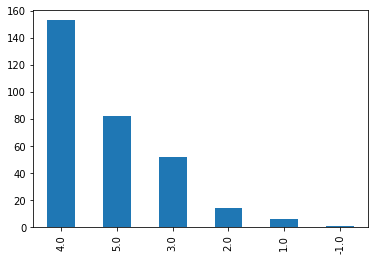

In [45]:
# Посмотрим, что у нас за категории в famrel
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
display('==========================Посмотрим на пропуски===============================')
display(df.famrel.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.famrel.value_counts())
display('==========================Статистику==========================================')
display(df.famrel.describe())
display('==========================Гистограмма==========================================')
df.famrel.value_counts().plot(kind='bar')

In [46]:
# сразу исправим, как мне кажется, опечатку
df.famrel = df.famrel.apply(lambda x: 1 if x == -1 else x)
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,153
5.0,82
3.0,52
2.0,14
1.0,7


Получается, что 2/3 у нас живут в больших семьях, и подавляющее большинство живут в полной семье

In [47]:
# кто живет в большой семье с родителями - также 2/3
df[(df.famsize == 'GT3') & (df.Pstatus == 'T')].groupby(
    ['famsize', 'Pstatus'])['Pstatus'].count()

famsize  Pstatus
GT3      T          174
Name: Pstatus, dtype: int64

In [48]:
# кто живет в большой семье с родителями и имеет нормальные и хорошие отношения- только около 50%, но почти 88% от прошивающих
# в большой семье и с родителями
df[(df.famsize == 'GT3') & (df.Pstatus == 'T') & (df.famrel > 2)
   ].groupby(['famsize', 'Pstatus'])['Pstatus'].count()

famsize  Pstatus
GT3      T          152
Name: Pstatus, dtype: int64

In [49]:
# большая семья, но живут раздельно от родителей
df[(df.famsize == 'GT3') & (df.Pstatus == 'A')
   ][['famsize', 'Pstatus']].describe()

,famsize,Pstatus
count,16,16
unique,1,1
top,GT3,A
freq,16,16


In [50]:
# большая семья, но живут раздельно от родителей и отношения норм и хорошие
df[(df.famsize == 'GT3') & (df.Pstatus == 'A') & (
    df.famrel > 2)][['famsize', 'Pstatus']].describe()

,famsize,Pstatus
count,11,11
unique,1,1
top,GT3,A
freq,11,11


In [51]:
# маленькая семья, живут с родителями
df[(df.famsize == 'LE3') & (df.Pstatus == 'T')
   ][['famsize', 'Pstatus']].describe()

,famsize,Pstatus
count,72,72
unique,1,1
top,LE3,T
freq,72,72


In [52]:
# маленькая семья, живут с родителями и в норм и хороших отношениях
df[(df.famsize == 'LE3') & (df.Pstatus == 'T') & (
    df.famrel > 2)][['famsize', 'Pstatus']].describe()

,famsize,Pstatus
count,63,63
unique,1,1
top,LE3,T
freq,63,63


In [53]:
# маленькая семья, живут отдельно
df[(df.famsize == 'LE3') & (df.Pstatus == 'A')
   ][['famsize', 'Pstatus']].describe()

,famsize,Pstatus
count,11,11
unique,1,1
top,LE3,A
freq,11,11


In [54]:
# маленькая семья, живут отдельно и в норм и хороших отношениях
df[(df.famsize == 'LE3') & (df.Pstatus == 'A') & (
    df.famrel > 2)][['famsize', 'Pstatus']].describe()

,famsize,Pstatus
count,9,9
unique,1,1
top,LE3,A
freq,9,9


### Выводы
Большинство учеников живет в полных семьях, заполним недостающие места модой

In [55]:
df.Pstatus = df.Pstatus .fillna(df.Pstatus.mode()[0])
display(df.Pstatus.isna().sum())
display(df.Pstatus.value_counts())

0

T    301
A     30
Name: Pstatus, dtype: int64

Размер семьи в делится 2/3 - 1/3 'GT3' >3 и LE3' <= 3, соответственно, применим интерполяцию

In [56]:
# Filling in NaN in a Series by padding, but filling at most two consecutive NaN at a time.
df.famsize = df.famsize.interpolate(method='pad', limit=2)
display(df.famsize .isna().sum())
display(df.famsize .value_counts())

2

GT3    225
LE3    104
Name: famsize, dtype: int64

In [57]:
# Первые два значения у нас NaN, функция не знает, как интерполировать, заполним его модой
df.famsize = df.famsize.fillna(df.famsize.mode()[0])
display(df.famsize.isna().sum())
display(df.famsize .value_counts())

0

GT3    227
LE3    104
Name: famsize, dtype: int64

In [58]:
# просто сразу модой было вот так
# GT3    236
# LE3     95

В семейных отношениях уровень 4 вырывается вперед (медиана), примем его за главенствующее значение

In [59]:
df.famrel = df.famrel.fillna(df.famrel.mode()[0])
display(df.famrel.isna().sum())
display(df.famrel.value_counts())

0

4.0    176
5.0     82
3.0     52
2.0     14
1.0      7
Name: famrel, dtype: int64

In [60]:
# сохраним наш набор на этом этапе
df_copy2 = df.copy()

### Medu
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

'==========================Посмотрим на пропуски==============================='

2

'==========================Посмотрим на виды значений=========================='

4.0    122
2.0     84
3.0     79
1.0     42
0.0      2
Name: Medu, dtype: int64

'==========================Статистику=========================================='

count    329.000000
mean       2.841945
std        1.081695
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

'==========================Гистограмма=========================================='

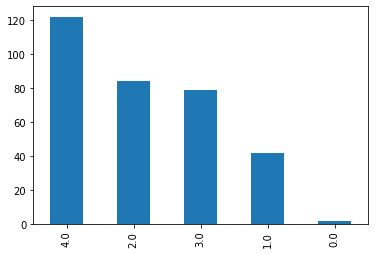

In [61]:
# Посмотрим, что у нас за категории в famrel
display('==========================Посмотрим на пропуски===============================')
display(df.Medu.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Medu.value_counts())
display('==========================Статистику==========================================')
display(df.Medu.describe())
display('==========================Гистограмма==========================================')
df.Medu.value_counts().plot(kind='bar')

In [62]:
# Образование матери такое, какое есть, значения 2 чуть больше, чем три, но 4 больше всех, заполним посему медианой
df.Medu = df.Medu.fillna(df.Medu.describe()['50%'])
display(df.Medu.isna().sum())
display(df.Medu.value_counts())

0

4.0    122
2.0     84
3.0     81
1.0     42
0.0      2
Name: Medu, dtype: int64

### Fedu
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

'==========================Посмотрим на пропуски==============================='

21

'==========================Посмотрим на виды значений=========================='

2.0     89
3.0     84
4.0     79
1.0     55
0.0      2
40.0     1
Name: Fedu, dtype: int64

'==========================Статистику=========================================='

count    310.000000
mean       2.712903
std        2.379421
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       40.000000
Name: Fedu, dtype: float64

'==========================Гистограмма=========================================='

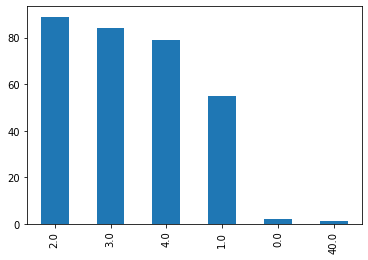

In [63]:
# Посмотрим, что у нас за категории в Fedu
display('==========================Посмотрим на пропуски===============================')
display(df.Fedu.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Fedu.value_counts())
display('==========================Статистику==========================================')
display(df.Fedu.describe())
display('==========================Гистограмма==========================================')
df.Fedu.value_counts().plot(kind='bar')

У нас 21 пропуск, один выскок. Но ранее мы выяснили, что показатель образования отца влияет на показатель оценок. Поэтому в данном случае мы проведем эксперимент, создадим поле с образованием отца и заполним его средним значеним (оно близко к модальному), затем модальным, затем интерполяционным значением и во всех случаях посмотрим на дескрайб учеников с оценкой 50 и выше и ниже 50. То заполнение, которое покажет для "умных" и "отстающих" тот же результат по отцам, примем за корректное заполнение. Если результаты будут вообще другие, придется расстаться с незаполненными значениями и выскоком, в смысле удалить.

In [64]:
# Создаем и заполняем среднюю колонку
df['Fedu_mean'] = df['Fedu']
df['Fedu_mean'] = df.Fedu_mean.fillna(df.Fedu_mean.describe()['50%'])
display(df.Fedu_mean.isna().sum())

0

In [65]:
# Создаем и заполняем модальную колонку
df['Fedu_mode'] = df['Fedu']
df['Fedu_mode'] = df.Fedu_mode.fillna(df.Fedu_mode.mode()[0])
display(df.Fedu_mode.isna().sum())

0

In [66]:
# Создаем и заполняем интерполяционную колонку
df['Fedu_interp'] = df['Fedu']
df.Fedu_interp = df.Fedu_interp.interpolate(method='pad', limit=2)
display(df.Fedu_interp.isna().sum())

0

In [67]:
# Создаем копию Fedu, чтобы не крутить ползунок
df['Fedu_copy'] = df['Fedu']

In [68]:
display('----------------Характеристики датасета с оценками >50-------------------')
df[df.score >= 50].describe(include='all')

'----------------Характеристики датасета с оценками >50-------------------'

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school,Fedu_mean,Fedu_mode,Fedu_interp,Fedu_copy
count,250,250.000000,250,250,250,250.000000,236.000000,236,228,239,228,232.000000,244.000000,235.000000,246,221,226,241,241,244.000000,234,231,228,250.000000,245.000000,246.000000,240.000000,242.000000,250.000000,238,250.000000,250.000000,250.000000,236.000000
unique,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,GP,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,GPU,NaN,NaN,NaN,NaN
freq,222,NaN,198,171,228,NaN,NaN,77,128,82,163,NaN,NaN,NaN,221,135,120,126,193,NaN,228,198,162,NaN,NaN,NaN,NaN,NaN,NaN,179,NaN,NaN,NaN,NaN
mean,NaN,16.396000,NaN,NaN,NaN,2.868000,2.792373,NaN,NaN,NaN,NaN,1.439655,2.077869,0.127660,NaN,NaN,NaN,NaN,NaN,-6.233607,NaN,NaN,NaN,3.964000,3.204082,2.975610,3.479167,6.417355,64.640000,NaN,2.804000,2.748000,2.780000,2.792373
std,NaN,1.052433,NaN,NaN,NaN,1.084102,2.663246,NaN,NaN,NaN,NaN,0.699892,0.878458,0.472175,NaN,NaN,NaN,NaN,NaN,2.635375,NaN,NaN,NaN,0.897735,0.999582,1.080162,1.449132,25.132912,12.565907,NaN,2.587734,2.593724,2.596646,2.663246
min,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,2.000000,1.000000,55.000000,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,16.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,62.500000,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,17.000000,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN,2.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,5.000000,4.000000,4.000000,5.000000,6.750000,75.000000,NaN,4.000000,4.000000,4.000000,4.000000


In [69]:
display('----------------Характеристики датасета с оценками <50-------------------')
df[df.score < 50].describe(include='all')

'----------------Характеристики датасета с оценками <50-------------------'

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school,Fedu_mean,Fedu_mode,Fedu_interp,Fedu_copy
count,81,81.000000,81,81,81,81.000000,74.000000,78,73,78,77,76.000000,81.000000,77.000000,78,76,71,78,80,81.000000,79,74,75,81.000000,80.000000,79.000000,78.000000,79.000000,81.000000,80,81.000000,81.000000,81.000000,74.000000
unique,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,GP,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,GPU,NaN,NaN,NaN,NaN
freq,74,NaN,61,56,73,NaN,NaN,31,38,32,60,NaN,NaN,NaN,56,52,37,39,67,NaN,75,64,47,NaN,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,NaN,NaN
mean,NaN,16.654321,NaN,NaN,NaN,2.765432,2.459459,NaN,NaN,NaN,NaN,1.407895,1.962963,0.454545,NaN,NaN,NaN,NaN,NaN,-5.888889,NaN,NaN,NaN,3.876543,3.262500,3.481013,3.679487,9.544304,37.530864,NaN,2.506173,2.419753,2.481481,2.459459
std,NaN,1.074250,NaN,NaN,NaN,1.063856,1.022878,NaN,NaN,NaN,NaN,0.676809,0.714920,0.803700,NaN,NaN,NaN,NaN,NaN,2.144761,NaN,NaN,NaN,0.796598,0.977516,1.060488,1.314194,11.642977,6.852165,NaN,0.988983,0.985700,1.001388,1.022878
min,NaN,15.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,3.000000,2.000000,30.000000,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,17.000000,NaN,NaN,NaN,3.000000,2.500000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,4.000000,4.000000,6.000000,40.000000,NaN,3.000000,2.000000,3.000000,2.500000
75%,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,14.000000,45.000000,NaN,3.000000,3.000000,3.000000,3.000000


Как видим, только при модальном заполнении результат близок к первоначальному, поэтому заполним модой

In [70]:
df.drop(['Fedu_mean', 'Fedu_mode', 'Fedu_interp',
         'Fedu_copy'], axis='columns', inplace=True)

In [71]:
# Заполняем Fedu средним, округленным до медианного
df['Fedu'] = df.Fedu.fillna(df.Fedu.mode()[0])
display(df.Fedu.isna().sum())

0

In [72]:
# Заменяем сороковой выброс, что за строка
df[df.Fedu == 40]
# номер и

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
11,GP,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0,GPU


In [73]:
df.loc[df.Fedu == 40]

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
11,GP,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0,GPU


In [74]:
# индекс
df.loc[df.Fedu == 40].index[0]

11

In [75]:
# передаем индекс в переменную
df_ind_fedu40 = df.loc[df.Fedu == 40].index[0]

In [76]:
# заполняем Fedu = 40 значением медианы (среднее примерно ей и равно)
df.loc[df_ind_fedu40, 'Fedu'] = df.Fedu.describe()['50%']

In [77]:
# 'это все не заработало'
# A value is trying to be set on a copy of a slice from a DataFrame

# это не заработало
# df[df.Fedu == 40].at[11, 'Fedu'] = 3
# df[df.Fedu == 40]

# это тоже
# df[df.Fedu == 40].loc[11, 'Fedu'] = 3

# это тоже
# df[df.Fedu == 40].iloc[0]['Fedu'] = 3

'==========================Посмотрим на пропуски==============================='

0

'==========================Посмотрим на виды значений=========================='

2.0    111
3.0     84
4.0     79
1.0     55
0.0      2
Name: Fedu, dtype: int64

'==========================Статистику=========================================='

count    331.00000
mean       2.55287
std        1.04711
min        0.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: Fedu, dtype: float64

'==========================Гистограмма=========================================='

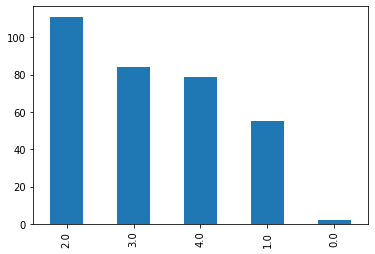

In [78]:
# Посмотрим еще раз, что у нас за категории в Fedu
display('==========================Посмотрим на пропуски===============================')
display(df.Fedu.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Fedu.value_counts())
display('==========================Статистику==========================================')
display(df.Fedu.describe())
display('==========================Гистограмма==========================================')
df.Fedu.value_counts().plot(kind='bar')

### Mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

'==========================Посмотрим на пропуски==============================='

17

'==========================Посмотрим на виды значений=========================='

other       108
services     82
teacher      50
at_home      45
health       29
Name: Mjob, dtype: int64

'==========================Статистику=========================================='

count       314
unique        5
top       other
freq        108
Name: Mjob, dtype: object

'==========================Гистограмма=========================================='

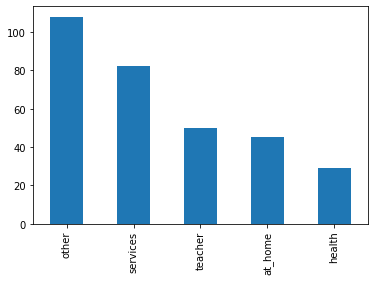

In [79]:
# Посмотрим, что у нас за категории в Mjob
display('==========================Посмотрим на пропуски===============================')
display(df.Mjob.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Mjob.value_counts())
display('==========================Статистику==========================================')
display(df.Mjob.describe())
display('==========================Гистограмма==========================================')
df.Mjob.value_counts().plot(kind='bar')

In [80]:
# Интерполируем пропуски, дабы добавить как-то равномерно
df.Mjob = df.Mjob.interpolate(method='pad', limit=2)
display(df.Mjob.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Mjob.value_counts())

0

'==========================Посмотрим на виды значений=========================='

other       114
services     87
teacher      53
at_home      48
health       29
Name: Mjob, dtype: int64

### Fjob 
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

'==========================Посмотрим на пропуски==============================='

30

'==========================Посмотрим на виды значений=========================='

other       166
services     83
teacher      26
health       14
at_home      12
Name: Fjob, dtype: int64

'==========================Статистику=========================================='

count       301
unique        5
top       other
freq        166
Name: Fjob, dtype: object

'==========================Гистограмма=========================================='

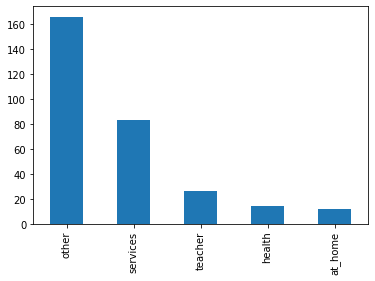

In [81]:
# Посмотрим, что у нас за категории в Fjob
display('==========================Посмотрим на пропуски===============================')
display(df.Fjob.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Fjob.value_counts())
display('==========================Статистику==========================================')
display(df.Fjob.describe())
display('==========================Гистограмма==========================================')
df.Fjob.value_counts().plot(kind='bar')

In [82]:
# Поступим также. Интерполируем пропуски, дабы добавить как-то равномерно
df.Fjob = df.Fjob.interpolate(method='pad', limit=2)
display(df.Fjob.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.Fjob.value_counts())

0

'==========================Посмотрим на виды значений=========================='

other       181
services     94
teacher      26
at_home      15
health       15
Name: Fjob, dtype: int64

### reason 
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

'==========================Посмотрим на пропуски==============================='

14

'==========================Посмотрим на виды значений=========================='

course        114
reputation     89
home           83
other          31
Name: reason, dtype: int64

'==========================Статистику=========================================='

count        317
unique         4
top       course
freq         114
Name: reason, dtype: object

'==========================Гистограмма=========================================='

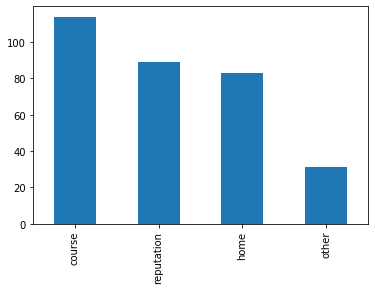

In [83]:
# Посмотрим, что у нас за категории в reason
display('==========================Посмотрим на пропуски===============================')
display(df.reason.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.reason.value_counts())
display('==========================Статистику==========================================')
display(df.reason.describe())
display('==========================Гистограмма==========================================')
df.reason.value_counts().plot(kind='bar')

In [84]:
# Посмотрим, сколько выбрали близость дома и до школы менее 15 минут
df[(df.reason == 'home') & (df.traveltime == 1)]

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
3,GP,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,GPU
4,GP,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,GPU
6,GP,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0,NaN
8,GP,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0,GPU
9,GP,15,U,LE3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0,GPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,GP,18,U,LE3,T,3.0,3.0,services,services,home,mother,1.0,4.0,0.0,no,yes,no,no,yes,-12.0,yes,yes,no,5.0,NaN,3.0,1.0,7.0,85.0,GPU
339,GP,17,R,GT3,A,3.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,2.0,4.0,50.0,GPR
342,GP,18,U,LE3,T,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,NaN,11.0,75.0,GPU
378,MS,18,U,GT3,T,3.0,3.0,other,other,home,mother,1.0,2.0,0.0,no,no,yes,no,yes,-6.0,yes,yes,yes,4.0,1.0,3.0,1.0,0.0,75.0,MSU


Лишь две трети. Поэтому нельзя сказать, что так как близко до дома, поэтому выбрали школу, и следовательно по близости к дому не заполним пропуски, заполним интерполяцией

In [85]:
# Поступим также. Интерполируем пропуски, дабы добавить как-то равномерно
df.reason = df.reason.interpolate(method='pad', limit=2)
display(df.reason.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.reason.value_counts())

0

'==========================Посмотрим на виды значений=========================='

course        120
reputation     94
home           84
other          33
Name: reason, dtype: int64

### guardian 
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

'==========================Посмотрим на пропуски==============================='

26

'==========================Посмотрим на виды значений=========================='

mother    223
father     76
other       6
Name: guardian, dtype: int64

'==========================Статистику=========================================='

count        305
unique         3
top       mother
freq         223
Name: guardian, dtype: object

'==========================Гистограмма=========================================='

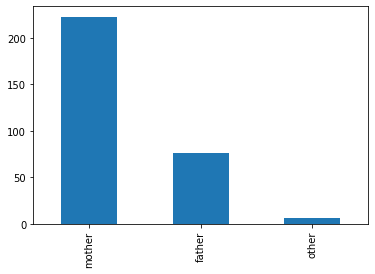

In [86]:
# Посмотрим, что у нас за категории в guardian
display('==========================Посмотрим на пропуски===============================')
display(df.guardian.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.guardian.value_counts())
display('==========================Статистику==========================================')
display(df.guardian.describe())
display('==========================Гистограмма==========================================')
df.guardian.value_counts().plot(kind='bar')

In [87]:
# Ничего мне эта колонка не говорит, интерполируем пропуски, дабы добавить как-то равномерно
df.guardian = df.guardian.interpolate(method='pad', limit=2)
display(df.guardian.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.guardian.value_counts())

0

'==========================Посмотрим на виды значений=========================='

mother    243
father     82
other       6
Name: guardian, dtype: int64

### traveltime 
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

'==========================Посмотрим на пропуски==============================='

23

'==========================Посмотрим на виды значений=========================='

1.0    204
2.0     82
3.0     15
4.0      7
Name: traveltime, dtype: int64

'==========================Статистику=========================================='

count    308.000000
mean       1.431818
std        0.693310
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

'==========================Гистограмма=========================================='

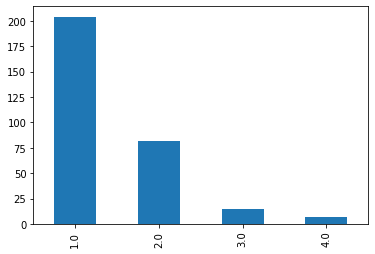

In [88]:
# Посмотрим, что у нас за категории в traveltime
display('==========================Посмотрим на пропуски===============================')
display(df.traveltime.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.traveltime.value_counts())
display('==========================Статистику==========================================')
display(df.traveltime.describe())
display('==========================Гистограмма==========================================')
df.traveltime.value_counts().plot(kind='bar')

In [89]:
# Поступим стандартно, интерполируем пропуски, дабы добавить как-то равномерно
df.traveltime = df.traveltime.interpolate(method='pad', limit=2)
display(df.traveltime.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.traveltime.value_counts())

0

'==========================Посмотрим на виды значений=========================='

1.0    219
2.0     89
3.0     16
4.0      7
Name: traveltime, dtype: int64

### studytime 
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

'==========================Посмотрим на пропуски==============================='

6

'==========================Посмотрим на виды значений=========================='

2.0    164
1.0     84
3.0     54
4.0     23
Name: studytime, dtype: int64

'==========================Статистику=========================================='

count    325.000000
mean       2.049231
std        0.841098
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

'==========================Гистограмма=========================================='

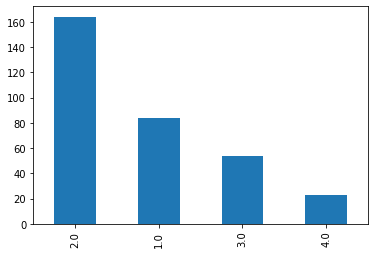

In [90]:
# Посмотрим, что у нас за категории в studytime
display('==========================Посмотрим на пропуски===============================')
display(df.studytime.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.studytime.value_counts())
display('==========================Статистику==========================================')
display(df.studytime.describe())
display('==========================Гистограмма==========================================')
df.studytime.value_counts().plot(kind='bar')

In [91]:
# Поступим стандартно, интерполируем пропуски, дабы добавить как-то равномерно
df.studytime = df.studytime.interpolate(method='pad', limit=2)
display(df.studytime.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.studytime.value_counts())

0

'==========================Посмотрим на виды значений=========================='

2.0    167
1.0     84
3.0     57
4.0     23
Name: studytime, dtype: int64

### failures 
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

'==========================Посмотрим на пропуски==============================='

19

'==========================Посмотрим на виды значений=========================='

0.0    268
1.0     30
2.0      7
3.0      7
Name: failures, dtype: int64

'==========================Статистику=========================================='

count    312.000000
mean       0.208333
std        0.587814
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

'==========================Гистограмма=========================================='

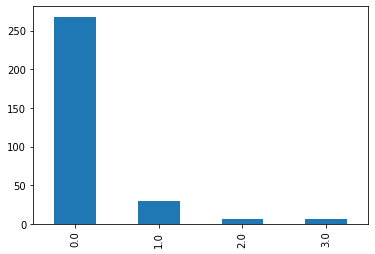

In [92]:
# Посмотрим, что у нас за категории в failures
display('==========================Посмотрим на пропуски===============================')
display(df.failures.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.failures.value_counts())
display('==========================Статистику==========================================')
display(df.failures.describe())
display('==========================Гистограмма==========================================')
df.failures.value_counts().plot(kind='bar')

In [93]:
# Здесь налицо заполнение модой
df.failures = df.failures.fillna(df.failures.mode()[0])
display(df.failures.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.failures.value_counts())

0

'==========================Посмотрим на виды значений=========================='

0.0    287
1.0     30
2.0      7
3.0      7
Name: failures, dtype: int64

### schoolsup 
дополнительная образовательная поддержка (yes или no)

'==========================Посмотрим на пропуски==============================='

7

'==========================Посмотрим на виды значений=========================='

no     277
yes     47
Name: schoolsup, dtype: int64

'==========================Статистику=========================================='

count     324
unique      2
top        no
freq      277
Name: schoolsup, dtype: object

'==========================Гистограмма=========================================='

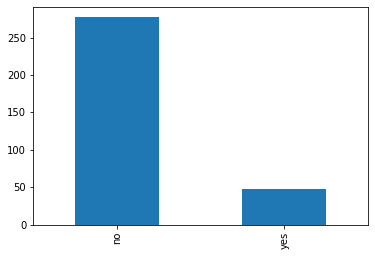

In [94]:
# Посмотрим, что у нас за категории в schoolsup
display('==========================Посмотрим на пропуски===============================')
display(df.schoolsup.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.schoolsup.value_counts())
display('==========================Статистику==========================================')
display(df.schoolsup.describe())
display('==========================Гистограмма==========================================')
df.schoolsup.value_counts().plot(kind='bar')

In [95]:
# Вроде можно и моду, но все-таки проинтерполирую
df.schoolsup = df.schoolsup.interpolate(method='pad', limit=2)
display(df.schoolsup.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.schoolsup.value_counts())

0

'==========================Посмотрим на виды значений=========================='

no     283
yes     48
Name: schoolsup, dtype: int64

### famsup 
семейная образовательная поддержка (yes или no)

'==========================Посмотрим на пропуски==============================='

34

'==========================Посмотрим на виды значений=========================='

yes    187
no     110
Name: famsup, dtype: int64

'==========================Статистику=========================================='

count     297
unique      2
top       yes
freq      187
Name: famsup, dtype: object

'==========================Гистограмма=========================================='

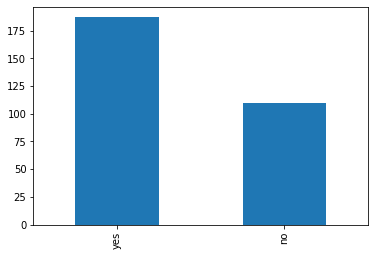

In [96]:
# Посмотрим, что у нас за категории в famsup
display('==========================Посмотрим на пропуски===============================')
display(df.famsup.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.famsup.value_counts())
display('==========================Статистику==========================================')
display(df.famsup.describe())
display('==========================Гистограмма==========================================')
df.famsup.value_counts().plot(kind='bar')

In [97]:
# Здесь однозначно интерполяция
df.famsup = df.famsup.interpolate(method='pad', limit=2)
display(df.famsup.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.famsup.value_counts())

2

'==========================Посмотрим на виды значений=========================='

yes    207
no     122
Name: famsup, dtype: int64

In [98]:
# у нас лимит 2, и не все заполнилось, запускаем еще раз
df.famsup = df.famsup.interpolate(method='pad', limit=2)
display(df.famsup.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.famsup.value_counts())

0

'==========================Посмотрим на виды значений=========================='

yes    207
no     124
Name: famsup, dtype: int64

============================================================================================

На этом месте, хотя стоило наверно раньше, было решено глянуть свойства колонок и принять решение, не проинтерполировать ли оставшиеся колонки (кроме оценок score) разом?

In [99]:
dff = df[['paid', 'activities', 'nursery', 'higher', 'internet',
          'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']]
dff.describe(include='all')

,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences
count,297,319,321,313,305,303,331.000000,325.000000,325.000000,318.000000,321.000000
unique,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN
top,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN
freq,157,165,260,303,262,209,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.942598,3.218462,3.098462,3.528302,7.186916
std,NaN,NaN,NaN,NaN,NaN,NaN,0.873706,0.993015,1.095514,1.417828,22.596099
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,3.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,8.000000


Рассмотрев, можем вполне категориальные колонки **'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'** заполнить интерполяцией значений, а "категориальные числовые" **'famrel', 'freetime', 'goout', 'health', 'absences'** медианными значениями, у всех колонок среднее приближено к медианному. Но сначала разберемся с выбросом в колонке **absences**, как мы это хотели сделать вначале.

И ВОТ ТУТ БЫЛО ВЫЯСНЕНО, ЧТО ЕСЛИ СНАЧАЛА НЕ ОБРАБОТАТЬ NaN, то при df = df[df.absences < 385] все строки с NaN удаляются, было 331 запись, 10 NaN и 321 absences, стало ноль NaN и 321 запись всего. Поэтому сначала проставляем наны, а затем удаляем выскоки.

Поэтому сначала заполняем пропуски данных.

In [100]:
# текстовые колонки 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
categ_col = ['paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for i in list(categ_col):
    df[i] = df[i].interpolate(method='pad', limit=2)
    print('В колонке %s получилось %d NaN значений' % (i, df[i].isna().sum()))

В колонке paid получилось 0 NaN значений
В колонке activities получилось 0 NaN значений
В колонке nursery получилось 0 NaN значений
В колонке higher получилось 0 NaN значений
В колонке internet получилось 1 NaN значений
В колонке romantic получилось 0 NaN значений


In [101]:
# Первое значение у нас NaN, функция не знает, как интерполировать, заполним его модой
df.internet = df.internet .fillna(df.internet .mode()[0])
display(df.internet .isna().sum())

0

In [102]:
# числовые колонки 'famrel', 'freetime', 'goout', 'health', 'absences'
number_col = ['studytime, granular', 'famrel',
              'freetime', 'goout', 'health', 'absences']

for i in list(number_col):
    df[i] = df[i].interpolate(method='pad', limit=2)
    print('В колонке %s получилось %d NaN значений' % (i, df[i].isna().sum()))

В колонке studytime, granular получилось 0 NaN значений
В колонке famrel получилось 0 NaN значений
В колонке freetime получилось 0 NaN значений
В колонке goout получилось 0 NaN значений
В колонке health получилось 0 NaN значений
В колонке absences получилось 0 NaN значений


Теперь разберемся с выбросом колонки **absences**

'==========================Посмотрим на пропуски==============================='

0

'==========================Посмотрим на виды значений=========================='

0.0      75
2.0      61
4.0      49
6.0      31
8.0      20
10.0     17
14.0     12
12.0     11
7.0       6
3.0       6
16.0      6
5.0       4
18.0      4
1.0       3
9.0       3
22.0      2
15.0      2
13.0      2
11.0      2
20.0      2
25.0      1
385.0     1
54.0      1
26.0      1
56.0      1
17.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
23.0      1
24.0      1
Name: absences, dtype: int64

'==========================Статистику=========================================='

count    331.000000
mean       7.120846
std       22.271273
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

'==========================Гистограмма=========================================='

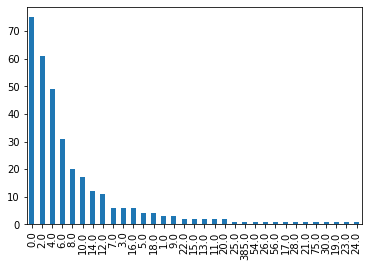

In [103]:
# Посмотрим, что у нас за категории в absences
display('==========================Посмотрим на пропуски===============================')
display(df.absences.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.absences.value_counts())
display('==========================Статистику==========================================')
display(df.absences.describe())
display('==========================Гистограмма==========================================')
df.absences.value_counts().plot(kind='bar')

In [104]:
# Удаляем, причем причем 212 пропусков у нас уже удалилось где-то ранее
# df = df.loc[df.absences < 385]
df = df[df.absences < 385]

'==========================Посмотрим на пропуски==============================='

0

'==========================Посмотрим на виды значений=========================='

0.0     75
2.0     61
4.0     49
6.0     31
8.0     20
10.0    17
14.0    12
12.0    11
7.0      6
3.0      6
16.0     6
18.0     4
5.0      4
9.0      3
1.0      3
20.0     2
22.0     2
13.0     2
15.0     2
11.0     2
25.0     1
17.0     1
54.0     1
26.0     1
23.0     1
24.0     1
28.0     1
21.0     1
75.0     1
30.0     1
19.0     1
56.0     1
Name: absences, dtype: int64

'==========================Статистику=========================================='

count    330.000000
mean       5.975758
std        7.885543
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

'==========================Гистограмма=========================================='

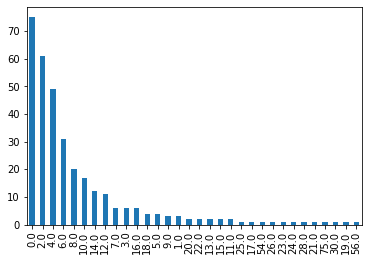

In [105]:
# Посмотрим, что у нас за категории в absences
display('==========================Посмотрим на пропуски===============================')
display(df.absences.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.absences.value_counts())
display('==========================Статистику==========================================')
display(df.absences.describe())
display('==========================Гистограмма==========================================')
df.absences.value_counts().plot(kind='bar')

'==========================Посмотрим на пропуски==============================='

0

'==========================Посмотрим на виды значений=========================='

GPU    242
GPR     53
MSR     19
MSU     16
Name: where_school, dtype: int64

'==========================Статистику=========================================='

count     330
unique      4
top       GPU
freq      242
Name: where_school, dtype: object

'==========================Гистограмма=========================================='

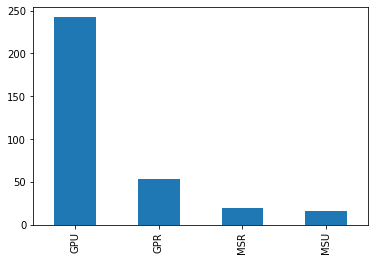

In [106]:
# Еще раз заполним колонку where_school
df['where_school'] = df['school']+df['address']
display('==========================Посмотрим на пропуски===============================')
display(df.where_school.isna().sum())
display('==========================Посмотрим на виды значений==========================')
display(df.where_school.value_counts())
display('==========================Статистику==========================================')
display(df.where_school.describe())
display('==========================Гистограмма==========================================')
df.where_school.value_counts().plot(kind='bar')

'==========================Посмотрим на пропуски==============================='

school                 0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
where_school           0
dtype: int64

'==========================Статистику=========================================='

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,16.460606,2.845455,2.551515,1.430303,2.057576,0.196970,-6.172727,3.948485,3.221212,3.103030,3.487879,5.975758,57.924242
std,1.063326,1.079117,1.048409,0.686157,0.839572,0.573469,2.518717,0.868434,0.990612,1.097797,1.438138,7.885543,16.289843
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,2.000000,2.000000,50.000000
50%,16.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,4.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,18.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,100.000000


'==========================Информацию=========================================='

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 393
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               330 non-null    object 
 1   age                  330 non-null    int64  
 2   address              330 non-null    object 
 3   famsize              330 non-null    object 
 4   Pstatus              330 non-null    object 
 5   Medu                 330 non-null    float64
 6   Fedu                 330 non-null    float64
 7   Mjob                 330 non-null    object 
 8   Fjob                 330 non-null    object 
 9   reason               330 non-null    object 
 10  guardian             330 non-null    object 
 11  traveltime           330 non-null    float64
 12  studytime            330 non-null    float64
 13  failures             330 non-null    float64
 14  schoolsup            330 non-null    object 
 15  famsup               330 non-null    obj

None

'----------------Оценим числовые колонки на графике-------------------'

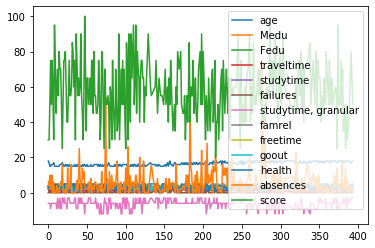

In [107]:
# Посмотрим, что у нас получилось в чистом остатке
display('==========================Посмотрим на пропуски===============================')
display(df.isna().sum())
display('==========================Статистику==========================================')
display(df.describe())
display('==========================Информацию==========================================')
display(df.info())
display('----------------Оценим числовые колонки на графике-------------------')
df.select_dtypes(include=['float64', 'int64']).plot()

Осталось закадкой колонка **studytime, granular**

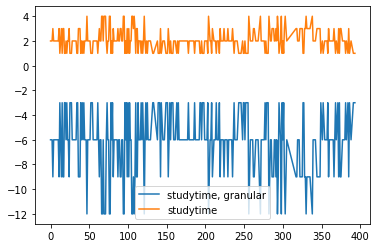

In [108]:
dop_df = df[['studytime, granular', 'studytime']]
dop_df.plot()

Я вижу некоторую обратную корреляцию у этих колонок, пусть пока остается.

====================================================================================

### ВЫВОДЫ

Мы получили 330 чистых записей, которые, по нашему мнению, будут отражать реальные данные, пропущенные значения заполнялись в основном методом интерполяции, что, как видится, позволило "равномерно" добавить данные, что, как мы считаем, более корректно, чем огульное заполнение средними или медианными значениями, последние использовались в случаях, когда модальных значений большинство или в случае специальных исследований.

In [109]:
# сначала >= 50
display('----------------Характеристики датасета с оценками >50-------------------')
df[df.score >= 50].describe(include='all')

'----------------Характеристики датасета с оценками >50-------------------'

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
count,249,249.000000,249,249,249,249.000000,249.000000,249,249,249,249,249.000000,249.000000,249.000000,249,249,249,249,249,249.000000,249,249,249,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249
unique,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4
top,GP,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,GPU
freq,221,NaN,197,170,227,NaN,NaN,82,140,87,179,NaN,NaN,NaN,225,150,130,129,199,NaN,242,212,179,NaN,NaN,NaN,NaN,NaN,NaN,184
mean,NaN,16.397590,NaN,NaN,NaN,2.871486,2.594378,NaN,NaN,NaN,NaN,1.441767,2.088353,0.120482,NaN,NaN,NaN,NaN,NaN,-6.265060,NaN,NaN,NaN,3.971888,3.212851,2.979920,3.429719,4.883534,64.558233,NaN
std,NaN,1.054251,NaN,NaN,NaN,1.084881,1.066408,NaN,NaN,NaN,NaN,0.693883,0.875417,0.459600,NaN,NaN,NaN,NaN,NaN,2.626252,NaN,NaN,NaN,0.890821,0.995390,1.079314,1.477001,5.864609,12.524396,NaN
min,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,NaN
25%,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-9.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,2.000000,1.000000,55.000000,NaN
50%,NaN,16.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,60.000000,NaN
75%,NaN,17.000000,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN,2.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,5.000000,4.000000,4.000000,5.000000,7.000000,75.000000,NaN


In [110]:
# сначала >= 50
display('----------------Характеристики датасета с оценками >50-------------------')
df[df.score < 50].describe(include='all')

'----------------Характеристики датасета с оценками >50-------------------'

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,where_school
count,81,81.000000,81,81,81,81.000000,81.000000,81,81,81,81,81.000000,81.000000,81.000000,81,81,81,81,81,81.000000,81,81,81,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81
unique,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4
top,GP,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,GPU
freq,74,NaN,61,56,73,NaN,NaN,32,41,33,63,NaN,NaN,NaN,58,56,44,42,67,NaN,77,69,48,NaN,NaN,NaN,NaN,NaN,NaN,58
mean,NaN,16.654321,NaN,NaN,NaN,2.765432,2.419753,NaN,NaN,NaN,NaN,1.395062,1.962963,0.432099,NaN,NaN,NaN,NaN,NaN,-5.888889,NaN,NaN,NaN,3.876543,3.246914,3.481481,3.666667,9.333333,37.530864,NaN
std,NaN,1.074250,NaN,NaN,NaN,1.063856,0.985700,NaN,NaN,NaN,NaN,0.664812,0.714920,0.789593,NaN,NaN,NaN,NaN,NaN,2.144761,NaN,NaN,NaN,0.796598,0.981464,1.073675,1.303840,11.574757,6.852165,NaN
min,NaN,15.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,NaN
25%,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,3.000000,2.000000,30.000000,NaN
50%,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,4.000000,4.000000,6.000000,40.000000,NaN
75%,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,14.000000,45.000000,NaN


======================================================================

### Корреляционные исследования
Посмотрим на корреляции числовых столбцов


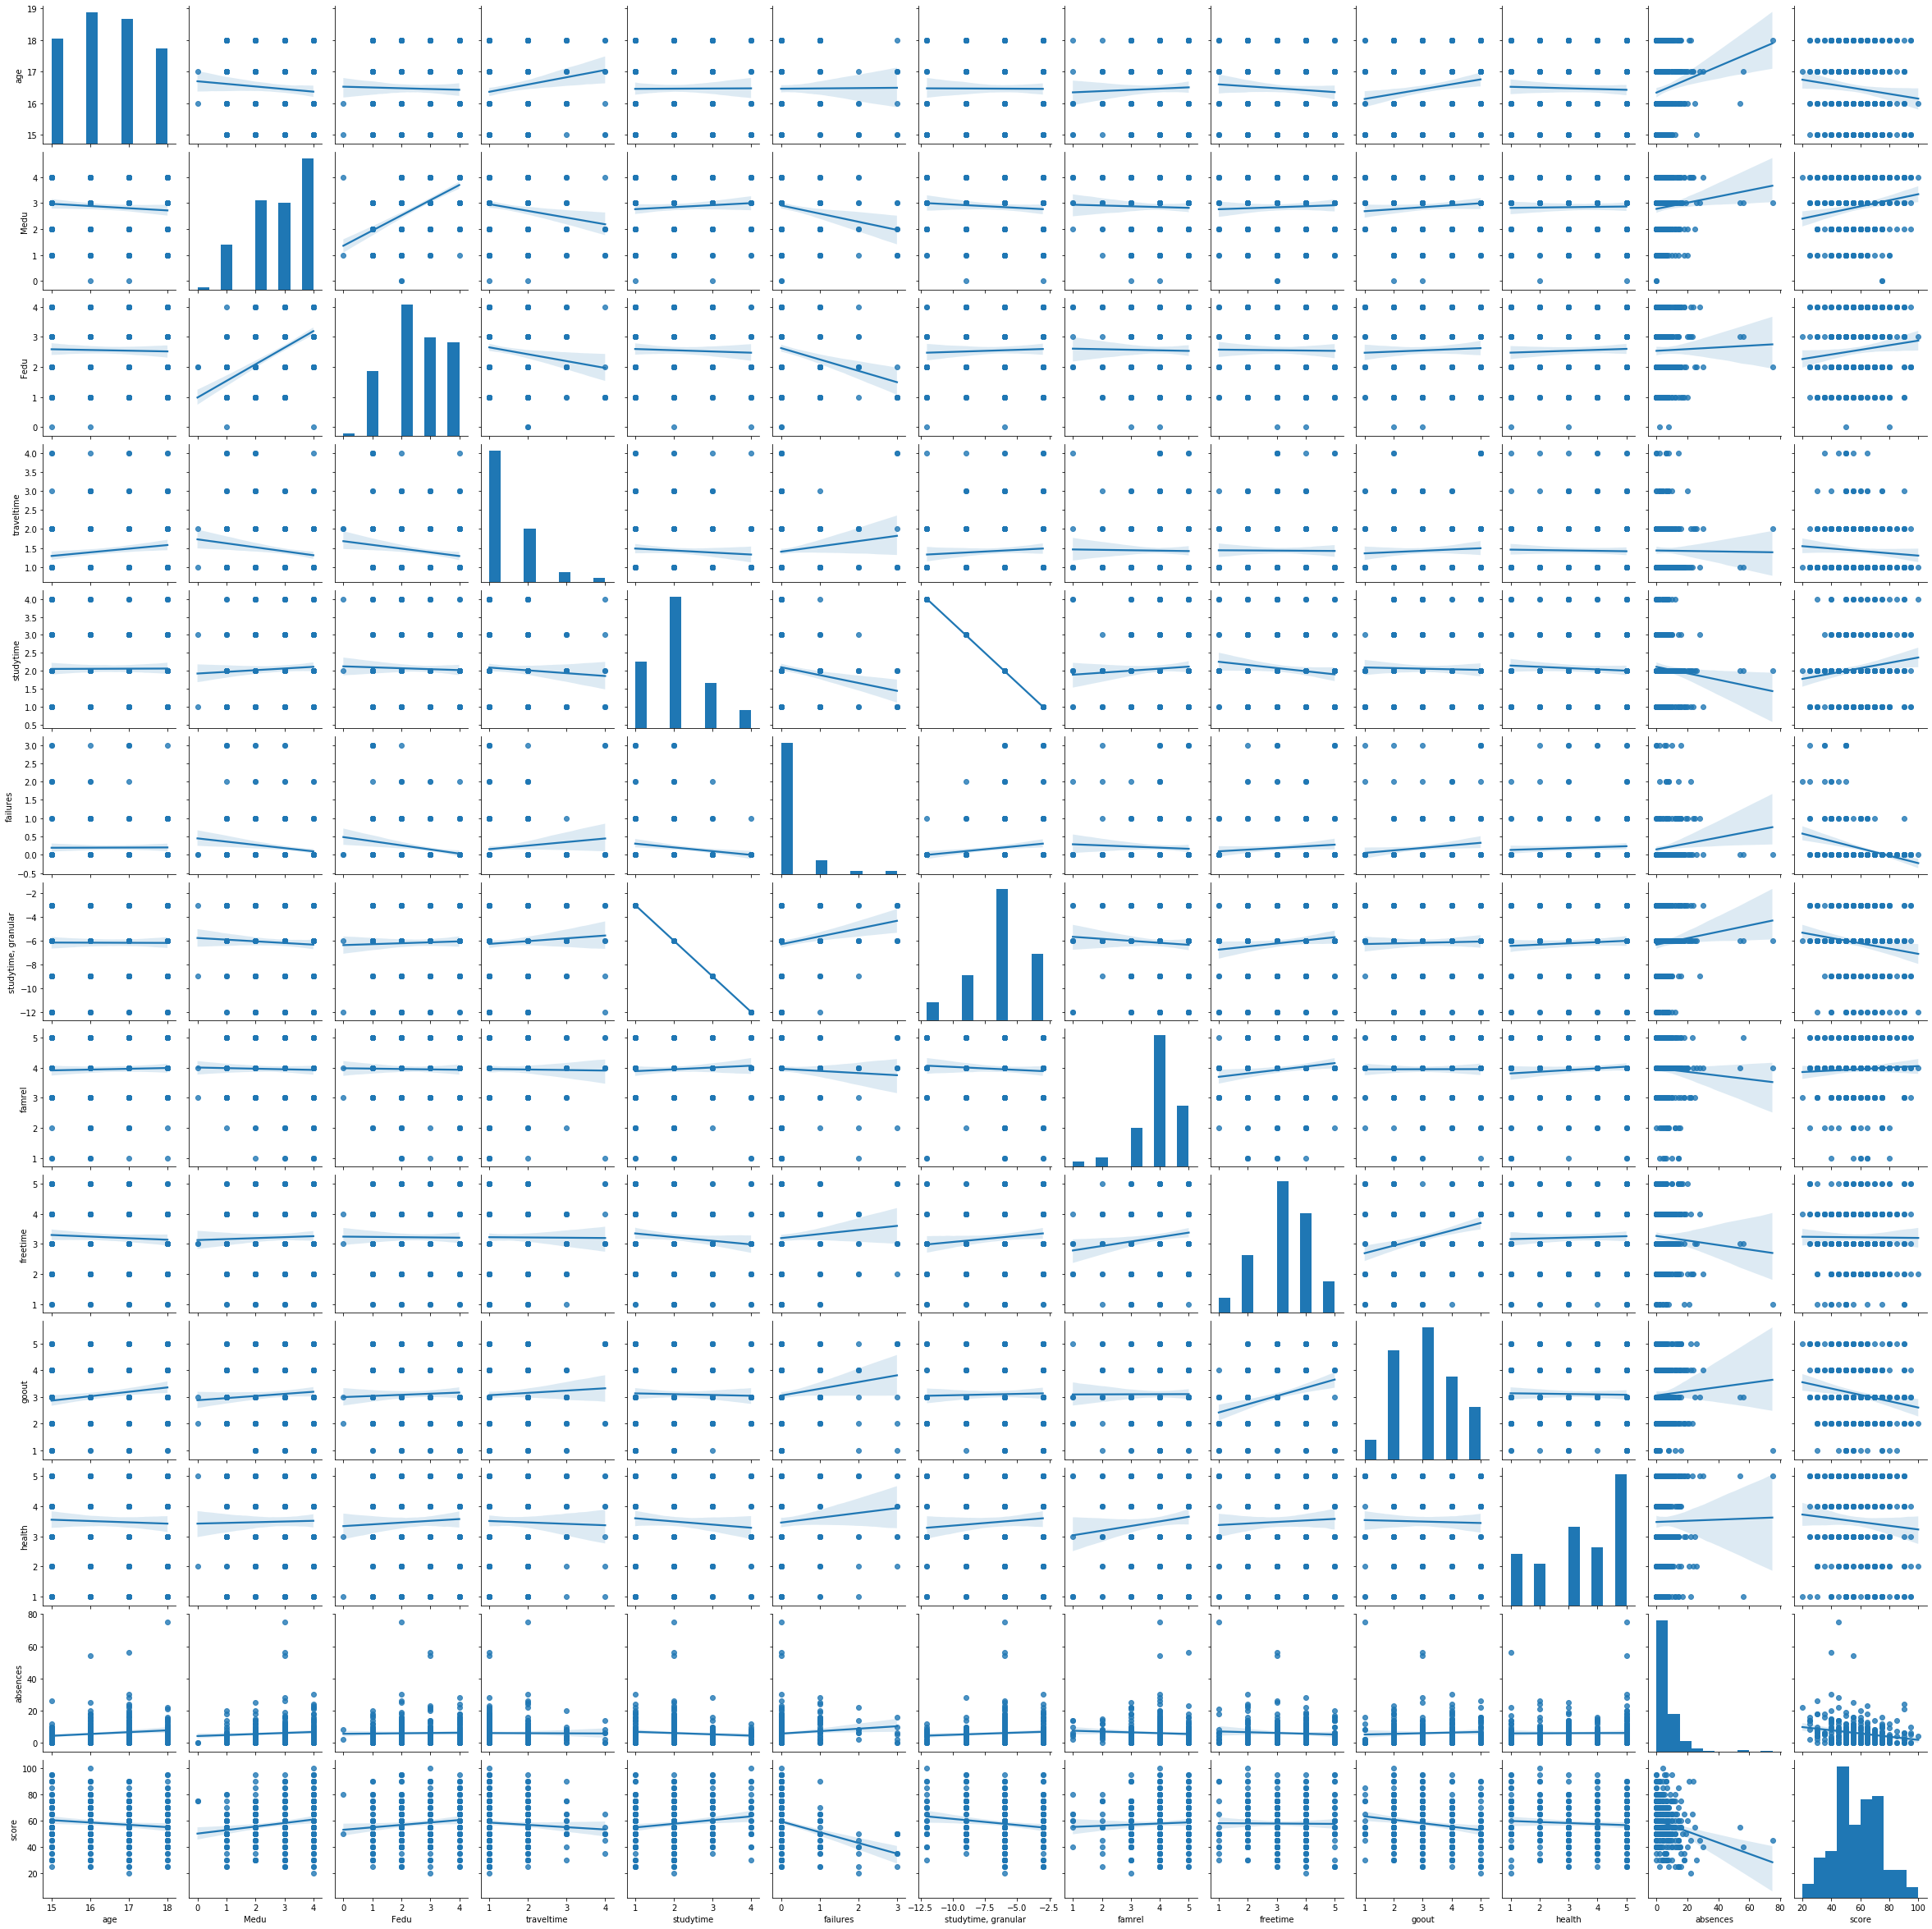

In [111]:
sns.pairplot(df, kind='reg')

In [112]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.083465,-0.024076,0.148283,0.004251,0.005287,-0.004251,0.032357,-0.056627,0.159718,-0.032115,0.153948,-0.114847
Medu,-0.083465,1.000000,0.567217,-0.164424,0.060174,-0.166772,-0.060174,-0.024738,0.034922,0.077625,0.017395,0.086714,0.177083
Fedu,-0.024076,0.567217,1.000000,-0.149214,-0.032732,-0.206509,0.032732,-0.015438,-0.009543,0.040270,0.042750,0.021476,0.118849
traveltime,0.148283,-0.164424,-0.149214,1.000000,-0.064242,0.116102,0.064242,-0.013695,-0.006315,0.053949,-0.022420,-0.007054,-0.073488
studytime,0.004251,0.060174,-0.032732,-0.064242,1.000000,-0.149886,-1.000000,0.058275,-0.103071,-0.022945,-0.061096,-0.084723,0.144334
failures,0.005287,-0.166772,-0.206509,0.116102,-0.149886,1.000000,0.149886,-0.046699,0.078230,0.131821,0.063714,0.111291,-0.286350
"studytime, granular",-0.004251,-0.060174,0.032732,0.064242,-1.000000,0.149886,1.000000,-0.058275,0.103071,0.022945,0.061096,0.084723,-0.144334
famrel,0.032357,-0.024738,-0.015438,-0.013695,0.058275,-0.046699,-0.058275,1.000000,0.129881,0.002396,0.093196,-0.056108,0.046133
freetime,-0.056627,0.034922,-0.009543,-0.006315,-0.103071,0.078230,0.103071,0.129881,1.000000,0.278041,0.034958,-0.060012,-0.008188
goout,0.159718,0.077625,0.040270,0.053949,-0.022945,0.131821,0.022945,0.002396,0.278041,1.000000,-0.018459,0.056117,-0.175818


Как было показано ранее, колонки **studytime, granular** и **studytime** имеют обратную корреляцию, вот пожалуй и все, что-то еще удалять не следует

### Анализ номинативных переменных

In [113]:
# Получим список категориальных столбцов
nominat_col = list(df.select_dtypes(include=['object']))
nominat_col

['school',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'where_school']

In [114]:
# Воспользуемся функцией для построения боксплота с 10ю самыми популярными
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [115]:
# и без оных, то есть все данные
def get_boxplot_all(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

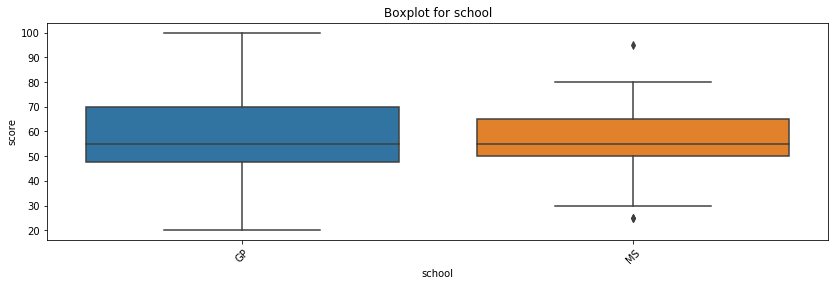

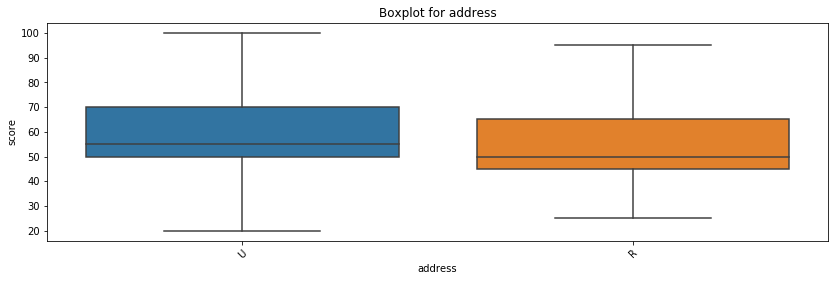

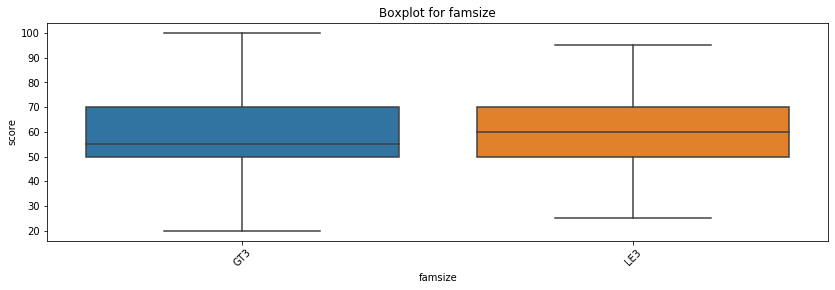

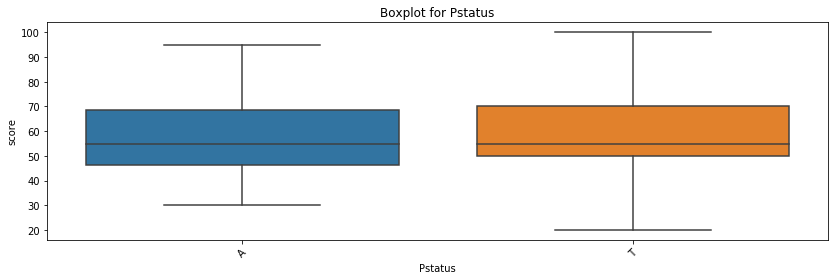

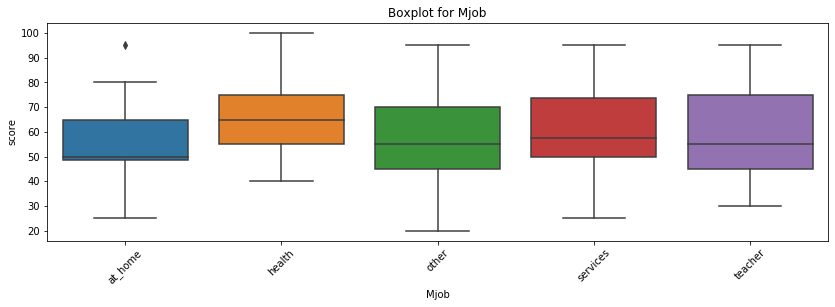

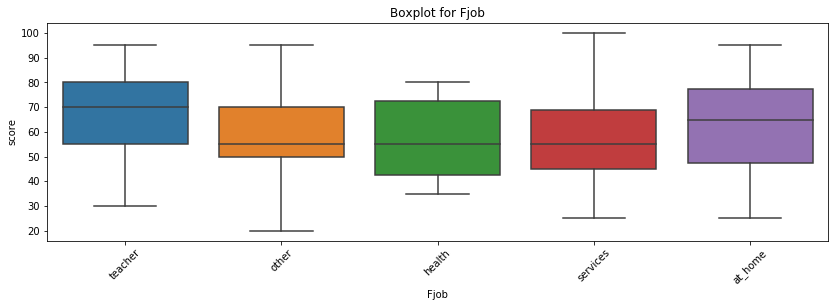

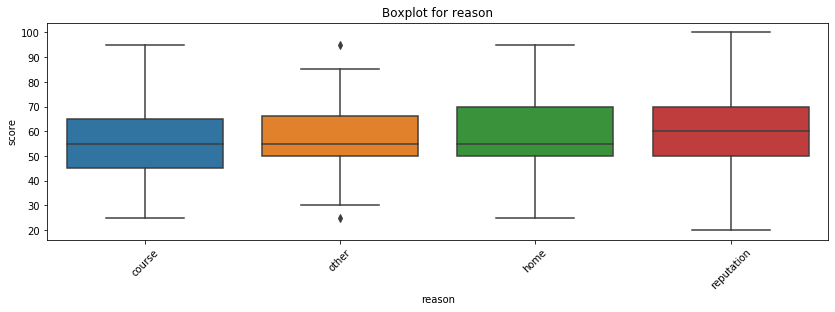

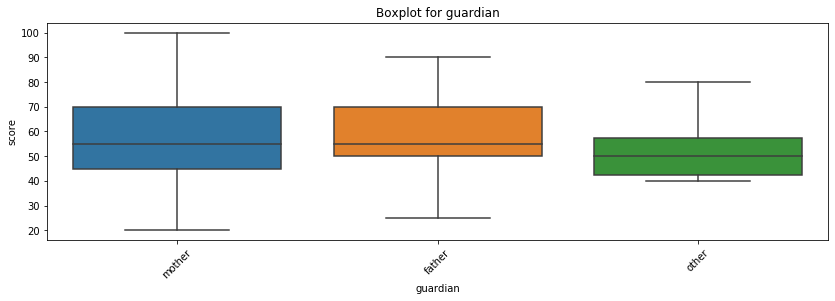

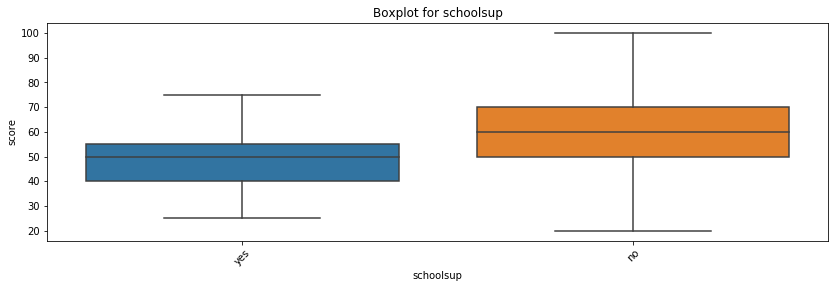

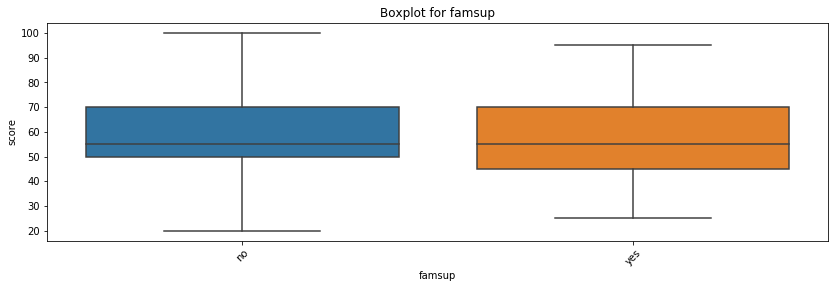

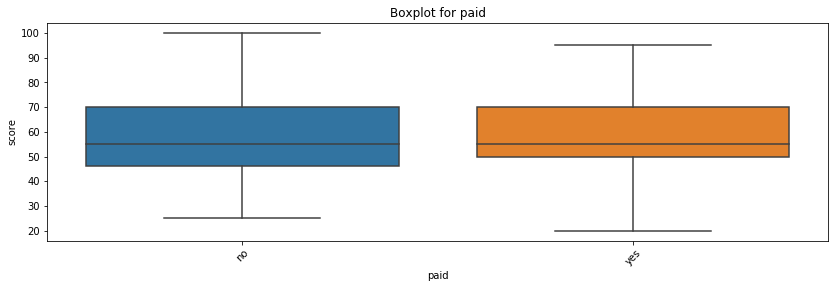

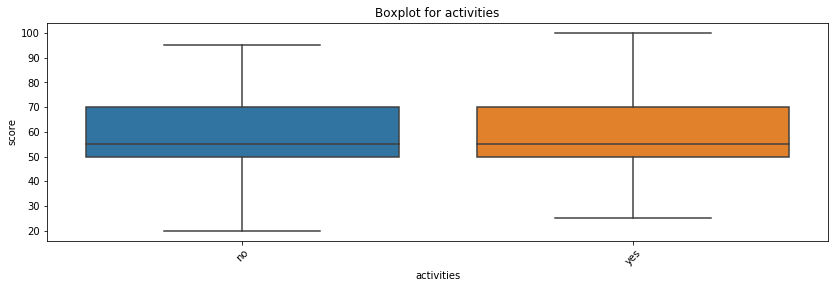

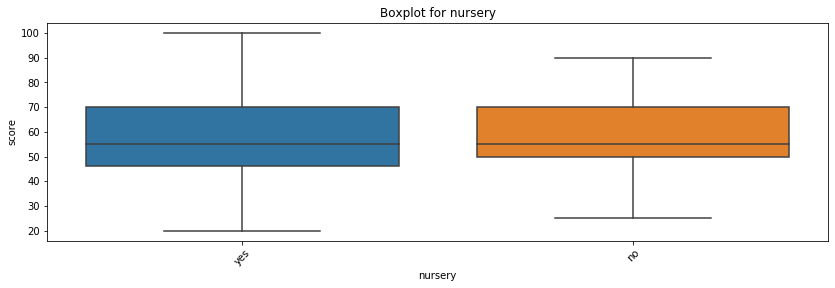

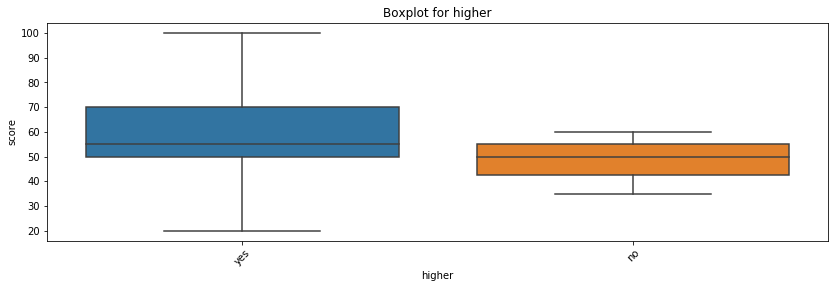

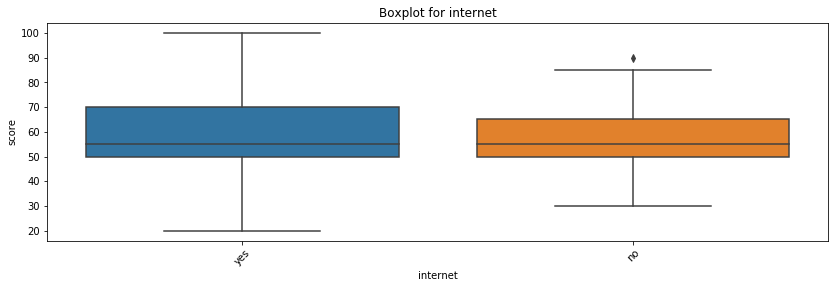

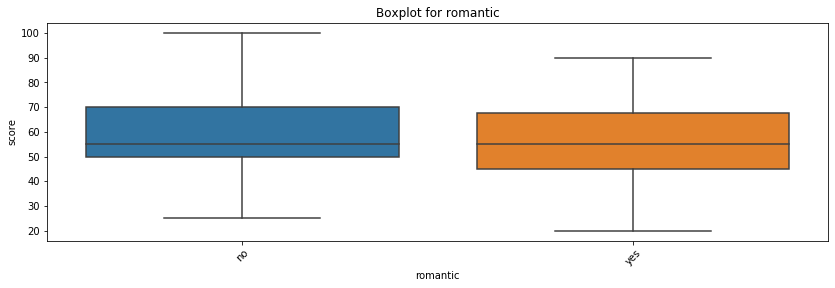

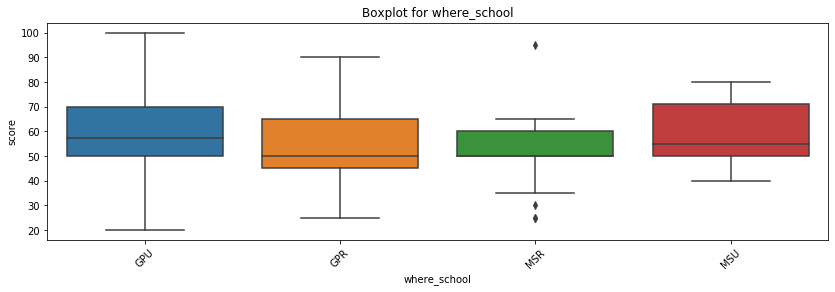

In [116]:
for col in nominat_col:
    get_boxplot(col)

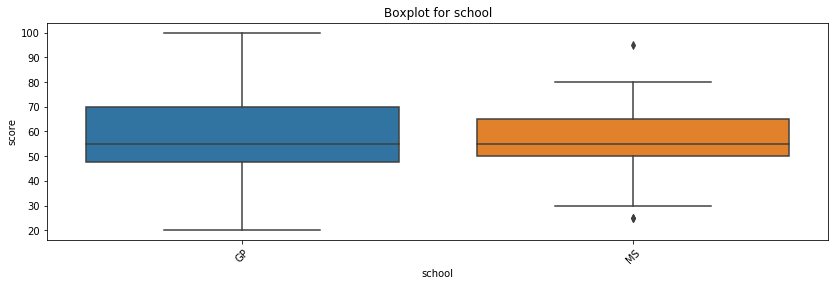

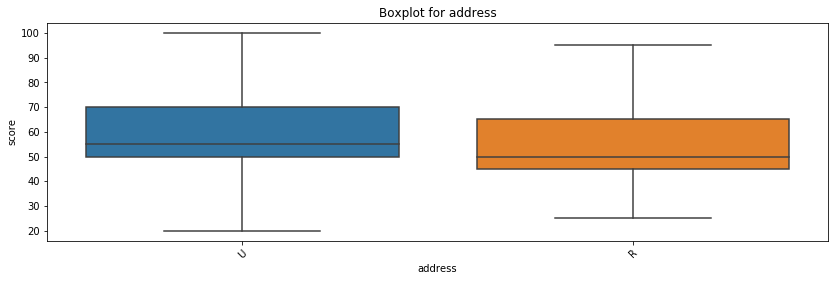

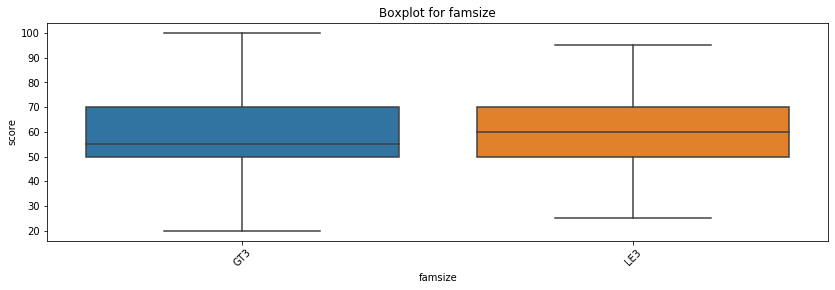

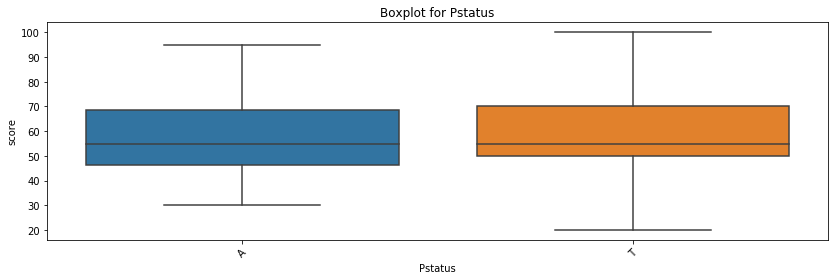

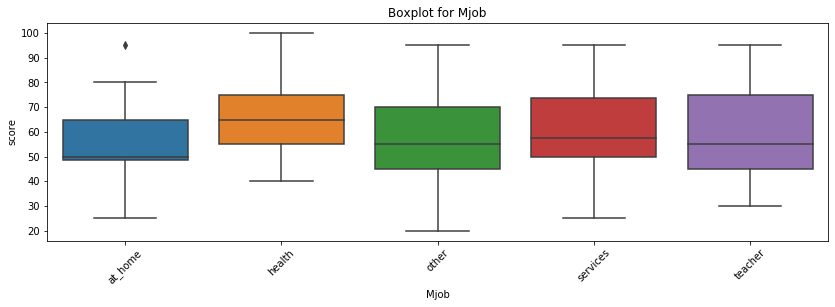

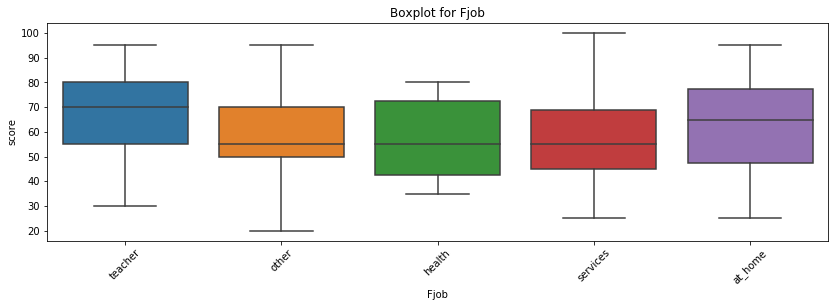

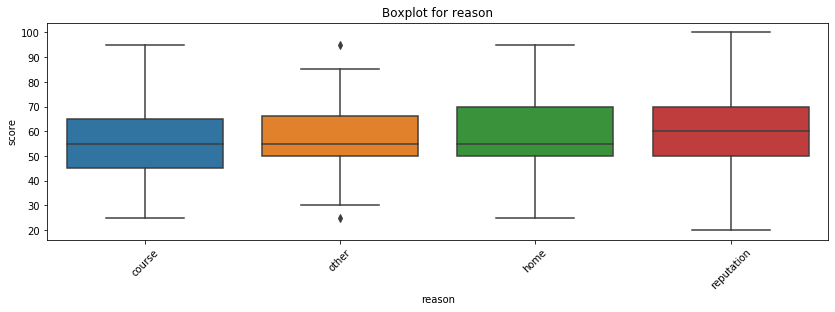

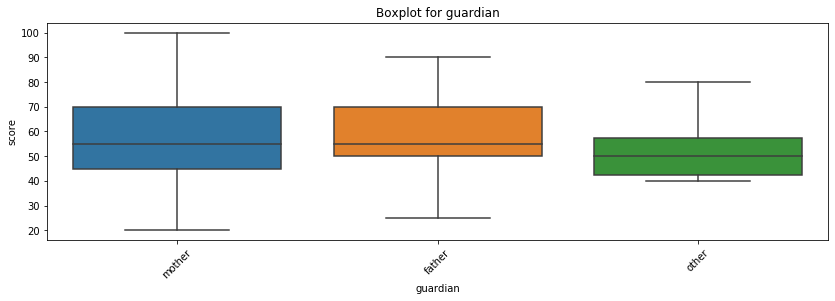

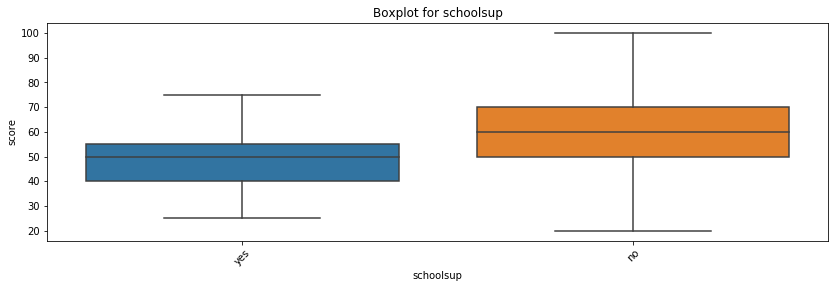

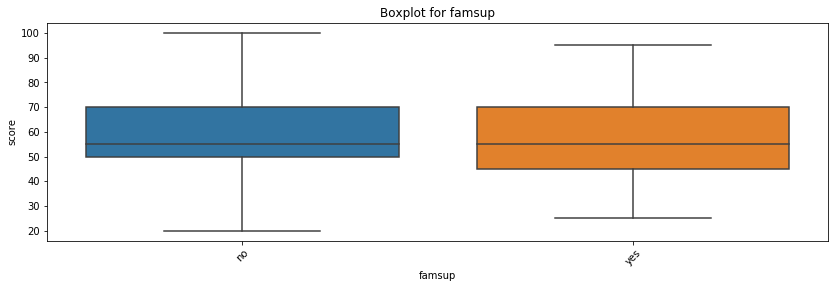

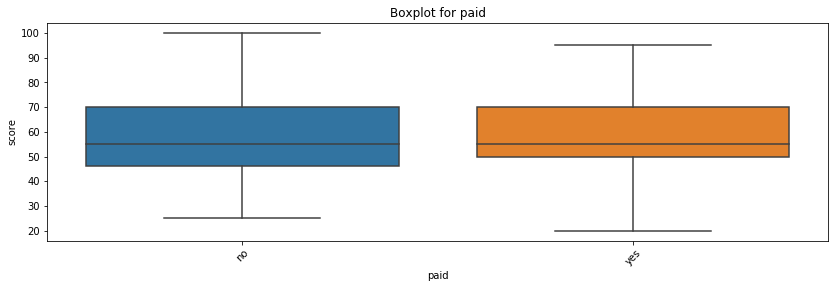

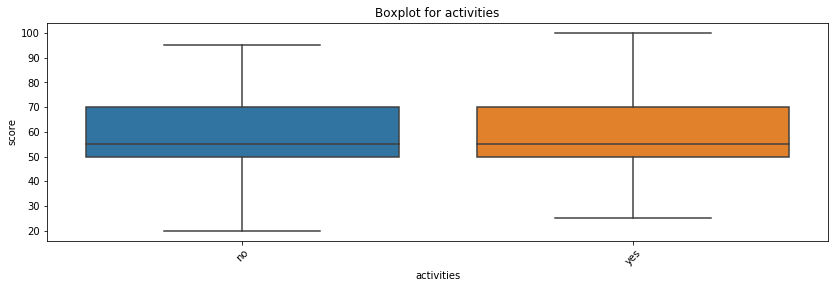

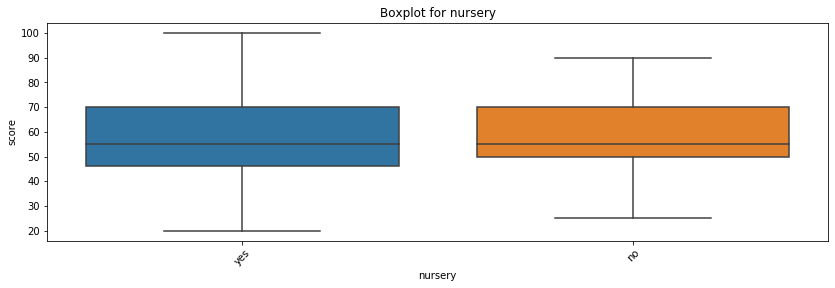

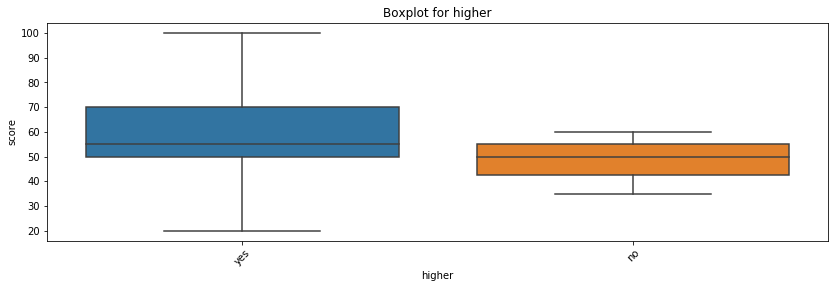

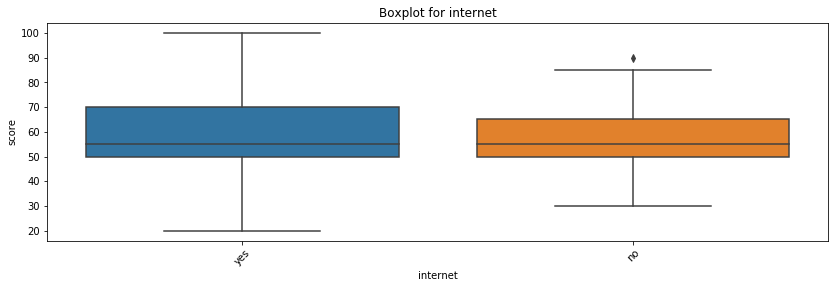

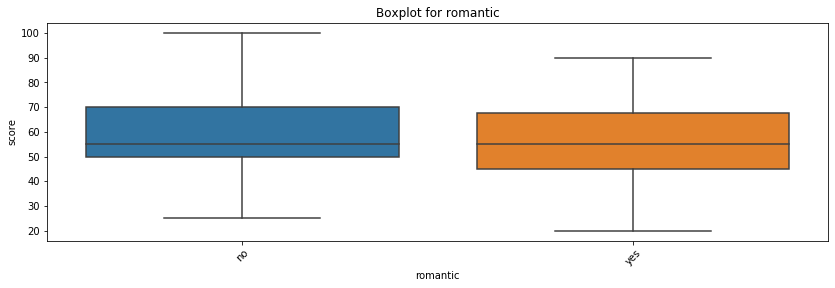

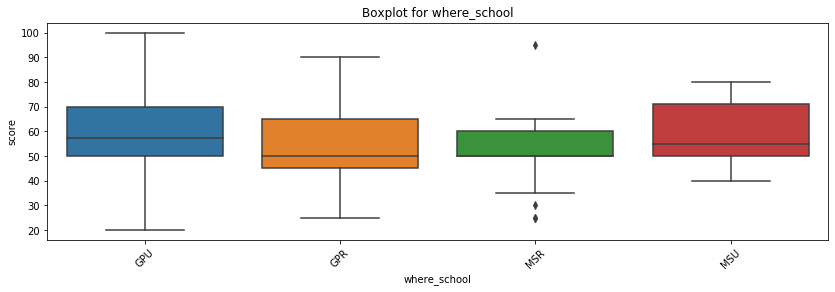

In [117]:
for col in nominat_col:
    get_boxplot_all(col)

По графикам похоже, что параметры **famsize**, **Pstatus**, **paid**, **activities**, **nursery** не особо влияют на оценки учеников. Проведем тест Стьюдента

In [118]:
# itertools.combinations(iterable, [r]) - комбинации длиной r из iterable без повторяющихся элементов.

# combinations('ABCD', 2) --> AB AC AD BC BD CD


def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони, я сразу понял)
            print('Найдены статистически значимые различия для колонки', column)
            break

In [119]:
# Разбор функции
display(df.loc[:, 'famsup'].value_counts().index[:10])
famsup = df.loc[:, 'famsup'].value_counts().index[:10]
display(list(combinations(famsup, 2)))

Index(['yes', 'no'], dtype='object')

[('yes', 'no')]

In [120]:
for col in nominat_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [121]:
# 0.1
# Найдены статистически значимые различия для колонки address
# Найдены статистически значимые различия для колонки Mjob
# Найдены статистически значимые различия для колонки schoolsup
# Найдены статистически значимые различия для колонки higher

# 0.01
# Найдены статистически значимые различия для колонки schoolsup

In [122]:
list(df.select_dtypes(include=['float64', 'int64']))

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime, granular',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

Получилось три значащих колонки из категориальных: address, Mjob, schoolsup, поэтому их и наши числовые оставляем в итоговом датасете

In [123]:
df_for_model = df.loc[:,
                      ['age',
                       'address',
                       'Medu',
                       'Fedu',
                       'Mjob',
                       'traveltime',
                       'studytime',
                       'failures',
                       'schoolsup',
                       'studytime, granular',
                       'famrel',
                       'freetime',
                       'goout',
                       'health',
                       'absences',
                       'score']]
display(df_for_model.head())
display(df_for_model.info())

,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,U,4.0,4.0,at_home,2.0,2.0,0.0,yes,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,U,1.0,1.0,at_home,1.0,2.0,0.0,no,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,U,1.0,1.0,at_home,1.0,2.0,3.0,yes,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,U,4.0,2.0,health,1.0,3.0,0.0,no,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,U,3.0,3.0,other,1.0,2.0,0.0,no,-6.0,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 393
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  330 non-null    int64  
 1   address              330 non-null    object 
 2   Medu                 330 non-null    float64
 3   Fedu                 330 non-null    float64
 4   Mjob                 330 non-null    object 
 5   traveltime           330 non-null    float64
 6   studytime            330 non-null    float64
 7   failures             330 non-null    float64
 8   schoolsup            330 non-null    object 
 9   studytime, granular  330 non-null    float64
 10  famrel               330 non-null    float64
 11  freetime             330 non-null    float64
 12  goout                330 non-null    float64
 13  health               330 non-null    float64
 14  absences             330 non-null    float64
 15  score                330 non-null    flo

None

### Итоги


- В данных около 5% пропущенных значений, к сожалению, "главный" столбец **score** содержал почти 40 нулевых значений, эти строки было решено изъять из анализа.

- Выбросы найдены только в столбцах **absences, Fedu и famrel**, причем для первого параметра это были скорее реальные данные, но выбивающиеся из общего ряда, а в третьем скорее опечатка.

- Был удален из анализа параметр **sex**, дабы не строить иллюзий насчет зависимости успеваемости от пола.

- При грубом, "мануальном" анализе была отмечена прямая зависимость оценок от количества пропущенных занятий **absences** и обратная от уровня образования отцов **Fedu**.

- Возможно, следует исследовать корреляцию параметров **Fedu** и **famrel** — семейные отношения, а также **Fedu** и **absences**, на вопрос, не влияет ли низкий уровень образованности отца на возбуждение плохих семейных отношений, и таким образом на нежелание посещать занятия, либо на, как следствие низкого собственного уровня образования, слабую мотивацию к посещениям занятий у ребенка.

- Был прослежен более высокий средний с уклоном в высокий уровень оценок у учеников школ типа MS, которые находятся в городе U, но, пожалуй, трудно сказать - это вызвано уровнем обучения в данных школах или тем, что в данные школы изначально попадают ученики с высоким средним баллом (например, после начальной школы).

- Расчетный анализ не показал корреляций каких-либо числовых параметров, что говорит о том, что многие параметры могут так или иначе влиять на оценки.

- Статистический анализ показал, что параметры **address, Mjob и schoolsup** имеют большое значение для дальнейших исследований.

- Была обнаружена обратная полная корреляция параметров **studytime** и **studytime, granular**, причем последний параметр не описан, о его значении можно только догадываться, например, это может быть "не потраченное время на учебу вне школы". Возможно, стоит исследовать корреляцию с параметром **freetime** — свободное время после школы.

- Для исследований осталось неясным роль и значение параметра **guardian** - опекун.

- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это **age**, **address**, **Medu**, **Fedu**, **Mjob**, **traveltime**, **studytime**, **failures**, **schoolsup**, **studytime, granular**, **famrel**, **reetime**, **goout**, **health**, **absences**.

### Анализ работы ("саморефлексия")
1. Какова была ваша роль в команде?

Не было никакой роли, моя группа вообще мертвая.

2. Какой частью своей работы вы остались особенно довольны?

Определение зависимости оценок от образования отца и от пропусков занятий. Использование интерполяции значений, а не повсеместное заполнение модами и медианами.

3. Что не получилось сделать так, как хотелось? Над чем ещё стоит поработать?

Абсолютно не понятен набор графиков функции sns.pairplot(df, kind='reg'), причем гугление и чтение документации не дали мне ответа, что же я построил, главное собственно не построить, а понять, что построил. Так же видно, что построение графиков страдает, опыта мало, не смог построить много чего, что хотел.

Кроме этого статистический анализ довольно туманен, просто списал. Из всего предыдущего модуля по статистике в функции **get_stat_dif** знакомое только pvalue, но что физически делает эта функция, неясно.

4. Что интересного и полезного вы узнали в этом модуле?

Вспомнили навыки Pandas, ознакомились с планом исследования данных

5. Что является вашим главным результатом при прохождении этого проекта?

Частично предсказал зависимость оценок от некоторых параметров, хотя подозреваю, это как раз пока и не нужно было делать. Вывел оптимальный для меня способ обзора колонок, к тому же и с графикой.

6. Какие навыки вы уже можете применить в текущей деятельности?

Вывел оптимальный для меня способ обзора колонок, к тому же и с графикой. Получил навык заполнения пробелов, узнал разницу между None и NaN при обработке данных.

7. Планируете ли вы дополнительно изучать материалы по теме проекта?

Да, так как многое осталось непонятным.

### Комментарии для ментора

Сергей, привет, проект интересный, но что именно от тебя хотят, разъяснено было как-то неочевидно. К середине ноутбука понял, что по сути можно было просто разом заполнить модами все колонки, устранить выбросы и корреляция со статистикой. Я же размышлял над зависимостями, рассматривал половину колонок индивидуально, что, вероятно, было излишне и отняло очень много времени. Но все-таки решил оставить, как есть.

Кстати, совершенно непонятно мне задание проекта по модулю статистика, я ожидал, что мы будем проверять гипотезы и искать вероятности.

Как писал в п.3 выше, с интерпретацией sns беда, корреляцию и статистику просто списал, мы проходили какую-то другую статистику)).

Я применил для заполнения пустот интерполяцию, наткнулся случайно, считаю это очень удачный метод, очень им доволен).